In [25]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr 
import pandas as pd

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

Populating the interactive namespace from numpy and matplotlib


# Read in Data

Carpenter Cases

In [26]:
#Full
qtotCF_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_3.csv')
qtotCF_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_5.csv')
qciCF_31_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_6.csv')
qciCF_21_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_7.csv')
qciCF_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_8.csv')
qciCF_23_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_9.csv')
qciCF_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_10.csv')
qciCF_35_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_11.csv')

qtotCF11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_12.csv')
qtotCF25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_13.csv')
qciCF31tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_14.csv')
qciCF21tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_15.csv')
qciCF11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_16.csv')
qciCF23tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_17.csv')
qciCF25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_18.csv')
qciCF35tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpFullEntrainment_19.csv')

#Half
qtotCH_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_3.csv')
qtotCH_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_5.csv')
qciCH_31_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_6.csv')
qciCH_21_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_7.csv')
qciCH_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_8.csv')
qciCH_23_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_9.csv')
qciCH_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_10.csv')
qciCH_35_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_11.csv')

qtotCH11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_12.csv')
qtotCH25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_13.csv')
qciCH31tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_14.csv')
qciCH21tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_15.csv')
qciCH11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_16.csv')
qciCH23tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_17.csv')
qciCH25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_18.csv')
qciCH35tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/CarpHalfEntrainment_19.csv')

#Cloudtop (.1g/kg 1 m/s) and Corebottom (.1g/kg 1 m/s)
corecarpf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/11_CarpFullCorebottomrho_100m_nssl1.csv')
corecarph = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/11_CarpHalfCorebottomrho_100m_nssl1.csv')

cloudcarpf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_CarpFull.csv')
cloudcarph = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_CarpHalf.csv')

Bubble Cases

In [27]:
#Full
qtotBF_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_3.csv')
qtotBF_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_5.csv')
qciBF_31_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_6.csv')
qciBF_21_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_7.csv')
qciBF_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_8.csv')
qciBF_23_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_9.csv')
qciBF_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_10.csv')
qciBF_35_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_11.csv')

qtotBF11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_12.csv')
qtotBF25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_13.csv')
qciBF31tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_14.csv')
qciBF21tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_15.csv')
qciBF11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_16.csv')
qciBF23tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_17.csv')
qciBF25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_18.csv')
qciBF35tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubFullEntrainment_19.csv')

#Half
qtotBH_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_3.csv')
qtotBH_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_5.csv')
qciBH_31_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_6.csv')
qciBH_21_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_7.csv')
qciBH_11_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_8.csv')
qciBH_23_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_9.csv')
qciBH_25_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_10.csv')
qciBH_35_tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_11.csv')

qtotBH11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_12.csv')
qtotBH25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_13.csv')
qciBH31tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_14.csv')
qciBH21tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_15.csv')
qciBH11tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_16.csv')
qciBH23tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_17.csv')
qciBH25tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_18.csv')
qciBH35tot = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/BubHalfEntrainment_19.csv')

#Cloudtop (.1g/kg 1 m/s) and Corebottom (.1g/kg 1 m/s)
corebubf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/11_BubFullCorebottomrho_100m_nssl.csv')
corebubh = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/11_BubHalfCorebottomrho_100m_nssl.csv')

cloudbubf = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_BubFull.csv')
cloudbubh = pd.read_csv('/Users/engelse2/Desktop/Final/Finalfiles/Cloudtop_100m_BubHalf.csv')


# Entrainment normalized by core surface area

Carpenter Cases

In [28]:
#Full
qtotentrainCF_11 = qtotCF_11_tot['eareaavg'][0:11056]
qtotentrainCF_25 = qtotCF_25_tot['eareaavg'][0:11056]
qcientrainCF_31 = qciCF_31_tot['eareaavg'][0:11056]
qcientrainCF_21 = qciCF_21_tot['eareaavg'][0:11056]
qcientrainCF_11 = qciCF_11_tot['eareaavg'][0:11056]
qcientrainCF_23 = qciCF_23_tot['eareaavg'][0:11056]
qcientrainCF_25 = qciCF_25_tot['eareaavg'][0:11056]
qcientrainCF_35 = qciCF_35_tot['eareaavg'][0:11056]

qtotentrainCF11 = qtotCF11tot['eareaavg'][0:11056]
qtotentrainCF25 = qtotCF25tot['eareaavg'][0:11056]
qcientrainCF31 = qciCF31tot['eareaavg'][0:11056]
qcientrainCF21 = qciCF21tot['eareaavg'][0:11056]
qcientrainCF11 = qciCF11tot['eareaavg'][0:11056]
qcientrainCF23 = qciCF23tot['eareaavg'][0:11056]
qcientrainCF25 = qciCF25tot['eareaavg'][0:11056]
qcientrainCF35 = qciCF35tot['eareaavg'][0:11056]

#Half
qtotentrainCH_11 = qtotCH_11_tot['eareaavg'][0:12061]
qtotentrainCH_25 = qtotCH_25_tot['eareaavg'][0:12061]
qcientrainCH_31 = qciCH_31_tot['eareaavg'][0:12061]
qcientrainCH_21 = qciCH_21_tot['eareaavg'][0:12061]
qcientrainCH_11 = qciCH_11_tot['eareaavg'][0:12061]
qcientrainCH_23 = qciCH_23_tot['eareaavg'][0:12061]
qcientrainCH_25 = qciCH_25_tot['eareaavg'][0:12061]
qcientrainCH_35 = qciCH_35_tot['eareaavg'][0:12061]

qtotentrainCH11 = qtotCH11tot['eareaavg'][0:12061]
qtotentrainCH25 = qtotCH25tot['eareaavg'][0:12061]
qcientrainCH31 = qciCH31tot['eareaavg'][0:12061]
qcientrainCH21 = qciCH21tot['eareaavg'][0:12061]
qcientrainCH11 = qciCH11tot['eareaavg'][0:12061]
qcientrainCH23 = qciCH23tot['eareaavg'][0:12061]
qcientrainCH25 = qciCH25tot['eareaavg'][0:12061]
qcientrainCH35 = qciCH35tot['eareaavg'][0:12061]


#Qtotcore Qvcore and Cloudtop Height
qtotcoreCF = corecarpf['qtotcorerhomvol']
qvcoreCF = corecarpf['qvrhomwareat']

qtotcoreCH = corecarph['qtotcorerhomvol']
qvcoreCH = corecarph['qvrhomwareat']

cloudhtCF = cloudcarpf['Height']
cloudareaCF = cloudcarpf['Area']

cloudhtCH = cloudcarph['Height']
cloudareaCH = cloudcarph['Area']

In [29]:
print((qcientrainCF35[11055]))

0.0


Bubble Cases

In [30]:
qtotentrainBF_11 = qtotBF_11_tot['eareaavg'][:]
qtotentrainBF_25 = qtotBF_25_tot['eareaavg'][:]
qcientrainBF_31 = qciBF_31_tot['eareaavg'][:]
qcientrainBF_21 = qciBF_21_tot['eareaavg'][:]
qcientrainBF_11 = qciBF_11_tot['eareaavg'][:]
qcientrainBF_23 = qciBF_23_tot['eareaavg'][:]
qcientrainBF_25 = qciBF_25_tot['eareaavg'][:]
qcientrainBF_35 = qciBF_35_tot['eareaavg'][:]

qtotentrainBF11 = qtotBF11tot['eareaavg'][:]
qtotentrainBF25 = qtotBF25tot['eareaavg'][:]
qcientrainBF31 = qciBF31tot['eareaavg'][:]
qcientrainBF21 = qciBF21tot['eareaavg'][:]
qcientrainBF11 = qciBF11tot['eareaavg'][:]
qcientrainBF23 = qciBF23tot['eareaavg'][:]
qcientrainBF25 = qciBF25tot['eareaavg'][:]
qcientrainBF35 = qciBF35tot['eareaavg'][:]

#Half
qtotentrainBH_11 = qtotBH_11_tot['eareaavg'][:]
qtotentrainBH_25 = qtotBH_25_tot['eareaavg'][:]
qcientrainBH_31 = qciBH_31_tot['eareaavg'][:]
qcientrainBH_21 = qciBH_21_tot['eareaavg'][:]
qcientrainBH_11 = qciBH_11_tot['eareaavg'][:]
qcientrainBH_23 = qciBH_23_tot['eareaavg'][:]
qcientrainBH_25 = qciBH_25_tot['eareaavg'][:]
qcientrainBH_35 = qciBH_35_tot['eareaavg'][:]

qtotentrainBH11 = qtotBH11tot['eareaavg'][:]
qtotentrainBH25 = qtotBH25tot['eareaavg'][:]
qcientrainBH31 = qciBH31tot['eareaavg'][:]
qcientrainBH21 = qciBH21tot['eareaavg'][:]
qcientrainBH11 = qciBH11tot['eareaavg'][:]
qcientrainBH23 = qciBH23tot['eareaavg'][:]
qcientrainBH25 = qciBH25tot['eareaavg'][:]
qcientrainBH35 = qciBH35tot['eareaavg'][:]

#Qtotcore Qvcore and Cloudtop Height
qtotcoreBF = corebubf['qtotcorerhomvol']
qvcoreBF = corebubf['qvrhomwareat']

qtotcoreBH = corebubh['qtotcorerhomvol']
qvcoreBH = corebubh['qvrhomwareat']

cloudhtBF = cloudbubf['Height']
cloudareaBF = cloudbubf['Area']

cloudhtBH = cloudbubh['Height']
cloudareaBH = cloudbubh['Area']

In [31]:
print(np.shape(qcientrainCF35))

(11056,)


# Cloudtop Stuff

In [32]:
levels1 = 76
levels2 = 76

In [33]:
#carpfull cloudtop create area and cloudtop height arrays
height1 = {}
area1 = {}
counter = -1
for i in np.arange(0,cloudcarpf['Height'][:].shape[0],levels1+1):
    counter = counter + 1
    h1 = np.asarray(cloudhtCF[i:i+levels1-1],dtype=float)
    a1 = np.asarray(cloudareaCF[i:i+levels1-1],dtype=float)
    height1[counter] = h1
    area1[counter] = a1

In [34]:
#carphalf cloudtop create area and cloudtop height arrays
height2 = {}
area2 = {}
counter = -1
for i in np.arange(0,cloudcarph['Height'][:].shape[0],levels1+1):
    counter = counter + 1
    h2 = np.asarray(cloudhtCH[i:i+levels1-1],dtype=float)
    a2 = np.asarray(cloudareaCH[i:i+levels1-1],dtype=float)
    height2[counter] = h2
    area2[counter] = a2

In [35]:
#fullbub cloudtop create area and cloudtop height
height3 = {}
area3 = {}
counter = -1
for i in np.arange(0,cloudbubf['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h3 = np.asarray(cloudhtBF[i:i+levels2-1],dtype=float)
    a3 = np.asarray(cloudareaBF[i:i+levels2-1],dtype=float)
    height3[counter] = h3
    area3[counter] = a3

In [36]:
#halfbub cloudtop create area and cloudtop height
height4 = {}
area4 = {}
counter = -1
for i in np.arange(0,cloudbubh['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h4 = np.asarray(cloudhtBH[i:i+levels2-1],dtype=float)
    a4 = np.asarray(cloudareaBH[i:i+levels2-1],dtype=float)
    height4[counter] = h4
    area4[counter] = a4

In [37]:
#carpfull cloudtop
cloudtop1=np.zeros(len(height1)-1)
for i in np.arange(1,len(height1)-1):
    trial1 = area1[i]
    trial2 = height1[i]
    trial1[trial1 ==0] = np.nan
    ind1 = np.where(trial1 == np.nanmin(trial1))
    if len(ind1[0]) == 0:
        cloudtop1[i] = 0.0
    elif len(ind1[0]) == 1:
        cloudtop1[i] = trial2[ind1[0]]
    elif len(ind1[0]) > 1:
        cloudtop1[i] = trial2[ind1[0][len(ind1)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [38]:
#carphalf cloudtop
cloudtop2=np.zeros(len(height2)-1)
for i in np.arange(1,len(height2)-1):
    trial3 = area2[i]
    trial4 = height2[i]
    trial3[trial3 ==0] = np.nan
    ind2 = np.where(trial3 == np.nanmin(trial3))
    if len(ind2[0]) == 0:
        cloudtop2[i] = 0.0
    elif len(ind2[0]) == 1:
        cloudtop2[i] = trial4[ind2[0]]
    elif len(ind2[0]) > 1:
        cloudtop2[i] = trial4[ind2[0][len(ind2)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [39]:
#halfbub cloudtop
cloudtop3=np.zeros(len(height3)-1)
for i in np.arange(1,len(height3)-1):
    trial5 = area3[i]
    trial6 = height3[i]
    trial5[trial5 ==0] = np.nan
    ind3 = np.where(trial5 == np.nanmin(trial5))
    if len(ind3[0]) == 0:
        cloudtop3[i] = 0.0
    elif len(ind3[0]) == 1:
        cloudtop3[i] = trial6[ind3[0]]
    elif len(ind3[0]) > 1:
        cloudtop3[i] = trial6[ind3[0][len(ind3)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


In [40]:
#fullbub cloudtop
cloudtop4=np.zeros(len(height4)-1)
for i in np.arange(1,len(height4)-1):
    trial7 = area4[i]
    trial8 = height4[i]
    trial7[trial7 ==0] = np.nan
    ind4 = np.where(trial7 == np.nanmin(trial7))
    if len(ind4[0]) == 0:
        cloudtop4[i] = 0.0
    elif len(ind4[0]) == 1:
        cloudtop4[i] = trial8[ind4[0]]
    elif len(ind4[0]) > 1:
        cloudtop4[i] = trial8[ind4[0][len(ind4)-1]]

/Users/engelse2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


# Make an array of entrainment with height per time and combine all times into dictionary

Carp Cases

In [41]:
#CarpFull
entrainCF1 = {}
entrainCF2 = {}
entrainCF3 = {}
entrainCF4 = {}
entrainCF5 = {}
entrainCF6 = {}
entrainCF7 = {}
entrainCF8 = {}
entrainCF9 = {}
entrainCF10 = {}
entrainCF11 = {}
entrainCF12 = {}
entrainCF13 = {}
entrainCF14 = {}
entrainCF15 = {}
entrainCF16 = {}

levels4 = 200
levels3 = 200

counter = -1
for i in np.arange(0,(qtotCF_11_tot['eareaavg'][0:11056]-1).shape[0],levels4+1):
#for i in np.arange(0,(qtotCF_11_tot['eareaavg'][0:7840]-1).shape[0],levels4+1):
    counter = counter+1                                                   #levels4 = number of rows skipping (200)
    
    eCF1 = np.asarray(qtotentrainCF_11[i:i+levels3-1],dtype=float)  
    eCF2 = np.asarray(qtotentrainCF_25[i:i+levels3-1],dtype=float)        #levels3 = number of levels of entrainment
    eCF3 = np.asarray(qcientrainCF_31[i:i+levels3-1],dtype=float)                #  **whole domain = 200**
    eCF4 = np.asarray(qcientrainCF_21[i:i+levels3-1],dtype=float) 
    eCF5 = np.asarray(qcientrainCF_11[i:i+levels3-1],dtype=float)
    eCF6 = np.asarray(qcientrainCF_23[i:i+levels3-1],dtype=float)
    eCF7 = np.asarray(qcientrainCF_25[i:i+levels3-1],dtype=float)
    eCF8 = np.asarray(qcientrainCF_35[i:i+levels3-1],dtype=float)
    eCF9 = np.asarray(qtotentrainCF11[i:i+levels3-1],dtype=float)  
    eCF10 = np.asarray(qtotentrainCF25[i:i+levels3-1],dtype=float) 
    eCF11 = np.asarray(qcientrainCF31[i:i+levels3-1],dtype=float)
    eCF12 = np.asarray(qcientrainCF21[i:i+levels3-1],dtype=float)
    eCF13 = np.asarray(qcientrainCF11[i:i+levels3-1],dtype=float)
    eCF14 = np.asarray(qcientrainCF23[i:i+levels3-1],dtype=float)
    eCF15 = np.asarray(qcientrainCF25[i:i+levels3-1],dtype=float)
    eCF16 = np.asarray(qcientrainCF35[i:i+levels3-1],dtype=float)
    
    entrainCF1[counter] = eCF1
    entrainCF2[counter] = eCF2  
    entrainCF3[counter] = eCF3  #eCF3 is a dict containing the entrainment values for all heights @ a given time
    entrainCF4[counter] = eCF4  #t=34 would be eCF3[34] & would contain all values of entrain for each height @ t=34
    entrainCF5[counter] = eCF5
    entrainCF6[counter] = eCF6
    entrainCF7[counter] = eCF7
    entrainCF8[counter] = eCF8
    entrainCF9[counter] = eCF9
    entrainCF10[counter] = eCF10     #entrainCF10 is dictionary eCF10 is array
    entrainCF11[counter] = eCF11
    entrainCF12[counter] = eCF12
    entrainCF13[counter] = eCF13
    entrainCF14[counter] = eCF14
    entrainCF15[counter] = eCF15
    entrainCF16[counter] = eCF16

In [42]:
#CarpHalf
entrainCH1 = {}
entrainCH2 = {}
entrainCH3 = {}
entrainCH4 = {}
entrainCH5 = {}
entrainCH6 = {}
entrainCH7 = {}
entrainCH8 = {}
entrainCH9 = {}
entrainCH10 = {}
entrainCH11 = {}
entrainCH12 = {}
entrainCH13 = {}
entrainCH14 = {}
entrainCH15 = {}
entrainCH16 = {}


counter = -1
for i in np.arange(0,(qtotCH_11_tot['eareaavg'][0:12061]-1).shape[0],levels4+1):
#for i in np.arange(0,(qtotCH_11_tot['eareaavg'][0:8845]-1).shape[0],levels4+1):    #same time scales
    counter = counter+1                                                   #levels4 = number of rows skipping (200)
    
    eCH1 = np.asarray(qtotentrainCH_11[i:i+levels3-1],dtype=float)  
    eCH2 = np.asarray(qtotentrainCH_25[i:i+levels3-1],dtype=float)        #levels3 = number of levels of entrainment
    eCH3 = np.asarray(qcientrainCH_31[i:i+levels3-1],dtype=float)                #  **whole domain = 200**
    eCH4 = np.asarray(qcientrainCH_21[i:i+levels3-1],dtype=float) 
    eCH5 = np.asarray(qcientrainCH_11[i:i+levels3-1],dtype=float)
    eCH6 = np.asarray(qcientrainCH_23[i:i+levels3-1],dtype=float)
    eCH7 = np.asarray(qcientrainCH_25[i:i+levels3-1],dtype=float)
    eCH8 = np.asarray(qcientrainCH_35[i:i+levels3-1],dtype=float)
    eCH9 = np.asarray(qtotentrainCH11[i:i+levels3-1],dtype=float)  
    eCH10 = np.asarray(qtotentrainCH25[i:i+levels3-1],dtype=float) 
    eCH11 = np.asarray(qcientrainCH31[i:i+levels3-1],dtype=float)
    eCH12 = np.asarray(qcientrainCH21[i:i+levels3-1],dtype=float)
    eCH13 = np.asarray(qcientrainCH11[i:i+levels3-1],dtype=float)
    eCH14 = np.asarray(qcientrainCH23[i:i+levels3-1],dtype=float)
    eCH15 = np.asarray(qcientrainCH25[i:i+levels3-1],dtype=float)
    eCH16 = np.asarray(qcientrainCH35[i:i+levels3-1],dtype=float)
    
    entrainCH1[counter] = eCH1
    entrainCH2[counter] = eCH2  
    entrainCH3[counter] = eCH3  
    entrainCH4[counter] = eCH4  
    entrainCH5[counter] = eCH5
    entrainCH6[counter] = eCH6
    entrainCH7[counter] = eCH7
    entrainCH8[counter] = eCH8
    entrainCH9[counter] = eCH9
    entrainCH10[counter] = eCH10     #entrainCH10 is dictionary eCH10 is array
    entrainCH11[counter] = eCH11
    entrainCH12[counter] = eCH12
    entrainCH13[counter] = eCH13
    entrainCH14[counter] = eCH14
    entrainCH15[counter] = eCH15
    entrainCH16[counter] = eCH16

# Check to see if it makes sense

In [43]:
print(entrainCH9[40])
#print(eCH9[0])

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.764
  1.63    2.25    2.68    3.15    3.42    4.19    3.75    4.59    5.63
  6.07    5.77    5.41    5.18    5.03    4.71    4.69    4.65    4.62
  4.57    4.4     4.09    3.88    3.62    3.63    3.69    3.57    3.48
  3.46    3.52    3.9     4.21    4.23    4.3     4.17    4.02    3.92
  3.89    3.79    3.87    3.98    4.12    4.06    4.17    4.4     4.33
  4.31    4.15    4.06    4.19    4.37    4.54    4.55    4.45    4.26
  4.05    3.87    4.02    4.17    4.34    4.34    4.17    4.2     4.38
  4.57    4.35    4.45    4.2     4.26    4.26    4.06    3.84    3.84
  3.78    3.71    3.57    3.59    3.67    3.65    3.33    3.34    3.56
  3.78    3.67    3.56    3.45    3.55    3.71    3.7     3.64    3.64
  3.56    3.38    3.1     3.09    3.31    3.59    3.7     3.75    3.82
  3.73    3.35    2.92    2.51    2.13    1.76    1.4     1.05    0.716
  0.369   0.0709  0.      0.      0.      0.      0.      0.      0.      0

Bubble Cases

In [44]:
#BubFull
entrainBF1 = {}
entrainBF2 = {}
entrainBF3 = {}
entrainBF4 = {}
entrainBF5 = {}
entrainBF6 = {}
entrainBF7 = {}
entrainBF8 = {}
entrainBF9 = {}
entrainBF10 = {}
entrainBF11 = {}
entrainBF12 = {}
entrainBF13 = {}
entrainBF14 = {}
entrainBF15 = {}
entrainBF16 = {}

levels4 = 200
levels3 = 200

counter = -1
for i in np.arange(0,qtotBF_11_tot['eareaavg'][:].shape[0],levels4+1):
    counter = counter+1                                                   #levels4 = number of rows skipping (200)
    
    eBF1 = np.asarray(qtotentrainBF_11[i:i+levels3-1],dtype=float)  
    eBF2 = np.asarray(qtotentrainBF_25[i:i+levels3-1],dtype=float)        #levels3 = number of levels of entrainment
    eBF3 = np.asarray(qcientrainBF_31[i:i+levels3-1],dtype=float)                #  **whole domain = 200**
    eBF4 = np.asarray(qcientrainBF_21[i:i+levels3-1],dtype=float) 
    eBF5 = np.asarray(qcientrainBF_11[i:i+levels3-1],dtype=float)
    eBF6 = np.asarray(qcientrainBF_23[i:i+levels3-1],dtype=float)
    eBF7 = np.asarray(qcientrainBF_25[i:i+levels3-1],dtype=float)
    eBF8 = np.asarray(qcientrainBF_35[i:i+levels3-1],dtype=float)
    eBF9 = np.asarray(qtotentrainBF11[i:i+levels3-1],dtype=float)  
    eBF10 = np.asarray(qtotentrainBF25[i:i+levels3-1],dtype=float) 
    eBF11 = np.asarray(qcientrainBF31[i:i+levels3-1],dtype=float)
    eBF12 = np.asarray(qcientrainBF21[i:i+levels3-1],dtype=float)
    eBF13 = np.asarray(qcientrainBF11[i:i+levels3-1],dtype=float)
    eBF14 = np.asarray(qcientrainBF23[i:i+levels3-1],dtype=float)
    eBF15 = np.asarray(qcientrainBF25[i:i+levels3-1],dtype=float)
    eBF16 = np.asarray(qcientrainBF35[i:i+levels3-1],dtype=float)
    
    entrainBF1[counter] = eBF1
    entrainBF2[counter] = eBF2  
    entrainBF3[counter] = eBF3  #eCF3 is a dict containing the entrainment values for all heights @ a given time
    entrainBF4[counter] = eBF4  #t=34 would be eCF3[34] & would contain all values of entrain for each height @ t=34
    entrainBF5[counter] = eBF5
    entrainBF6[counter] = eBF6
    entrainBF7[counter] = eBF7
    entrainBF8[counter] = eBF8
    entrainBF9[counter] = eBF9
    entrainBF10[counter] = eBF10     #entrainCF10 is dictionary e10 is array
    entrainBF11[counter] = eBF11
    entrainBF12[counter] = eBF12
    entrainBF13[counter] = eBF13
    entrainBF14[counter] = eBF14
    entrainBF15[counter] = eBF15
    entrainBF16[counter] = eBF16

# Check to see if it makes sense

In [45]:
# print(entrainBF12[40])

In [46]:
#BubHalf
entrainBH1 = {}
entrainBH2 = {}
entrainBH3 = {}
entrainBH4 = {}
entrainBH5 = {}
entrainBH6 = {}
entrainBH7 = {}
entrainBH8 = {}
entrainBH9 = {}
entrainBH10 = {}
entrainBH11 = {}
entrainBH12 = {}
entrainBH13 = {}
entrainBH14 = {}
entrainBH15 = {}
entrainBH16 = {}

levels4 = 200
levels3 = 200

counter = -1
for i in np.arange(0,qtotBH_11_tot['eareaavg'][:].shape[0],levels4+1):
    counter = counter+1                                                   #levels4 = number of rows skipping (200)
    
    eBH1 = np.asarray(qtotentrainBH_11[i:i+levels3-1],dtype=float)  
    eBH2 = np.asarray(qtotentrainBH_25[i:i+levels3-1],dtype=float)        #levels3 = number of levels of entrainment
    eBH3 = np.asarray(qcientrainBH_31[i:i+levels3-1],dtype=float)                #  **whole domain = 200**
    eBH4 = np.asarray(qcientrainBH_21[i:i+levels3-1],dtype=float) 
    eBH5 = np.asarray(qcientrainBH_11[i:i+levels3-1],dtype=float)
    eBH6 = np.asarray(qcientrainBH_23[i:i+levels3-1],dtype=float)
    eBH7 = np.asarray(qcientrainBH_25[i:i+levels3-1],dtype=float)
    eBH8 = np.asarray(qcientrainBH_35[i:i+levels3-1],dtype=float)
    eBH9 = np.asarray(qtotentrainBH11[i:i+levels3-1],dtype=float)  
    eBH10 = np.asarray(qtotentrainBH25[i:i+levels3-1],dtype=float) 
    eBH11 = np.asarray(qcientrainBH31[i:i+levels3-1],dtype=float)
    eBH12 = np.asarray(qcientrainBH21[i:i+levels3-1],dtype=float)
    eBH13 = np.asarray(qcientrainBH11[i:i+levels3-1],dtype=float)
    eBH14 = np.asarray(qcientrainBH23[i:i+levels3-1],dtype=float)
    eBH15 = np.asarray(qcientrainBH25[i:i+levels3-1],dtype=float)
    eBH16 = np.asarray(qcientrainBH35[i:i+levels3-1],dtype=float)
    
    entrainBH1[counter] = eBH1
    entrainBH2[counter] = eBH2  
    entrainBH3[counter] = eBH3  
    entrainBH4[counter] = eBH4  
    entrainBH5[counter] = eBH5
    entrainBH6[counter] = eBH6
    entrainBH7[counter] = eBH7
    entrainBH8[counter] = eBH8
    entrainBH9[counter] = eBH9
    entrainBH10[counter] = eBH10     #entrainCH10 is dictionary eCH10 is array
    entrainBH11[counter] = eBH11
    entrainBH12[counter] = eBH12
    entrainBH13[counter] = eBH13
    entrainBH14[counter] = eBH14
    entrainBH15[counter] = eBH15
    entrainBH16[counter] = eBH16

# Make dictionaries into arrays and sum over height for each time

Carp Cases

In [47]:
#CarpFull
t_qtotentraincf_11 = np.zeros(len(entrainCF1))
t_qtotentraincf_25 = np.zeros(len(entrainCF1))
t_qcientraincf_31 = np.zeros(len(entrainCF1))
t_qcientraincf_21 = np.zeros(len(entrainCF1))
t_qcientraincf_11 = np.zeros(len(entrainCF1))
t_qcientraincf_23 = np.zeros(len(entrainCF1))
t_qcientraincf_25 = np.zeros(len(entrainCF1))
t_qcientraincf_35 = np.zeros(len(entrainCF1))
t_qtotentraincf11 = np.zeros(len(entrainCF1))
t_qtotentraincf25 = np.zeros(len(entrainCF1))
t_qcientraincf31 = np.zeros(len(entrainCF1))
t_qcientraincf21 = np.zeros(len(entrainCF1))
t_qcientraincf11 = np.zeros(len(entrainCF1))
t_qcientraincf23 = np.zeros(len(entrainCF1))
t_qcientraincf25 = np.zeros(len(entrainCF1))
t_qcientraincf35 = np.zeros(len(entrainCF1))


for i in np.arange(0,len(entrainCF1)):
    qtotentrainsumcf_11 = entrainCF1[i]
    qtotentrainsumcf_25 = entrainCF2[i]
    qcientrainsumcf_31 = entrainCF3[i]
    qcientrainsumcf_21 = entrainCF4[i]      
    qcientrainsumcf_11 = entrainCF5[i]
    qcientrainsumcf_23 = entrainCF6[i]           #this is making the dictionary entrainBF6 an array 
    qcientrainsumcf_25 = entrainCF7[i]
    qcientrainsumcf_35 = entrainCF8[i]
    qtotentrainsumcf11 = entrainCF9[i]
    qtotentrainsumcf25 = entrainCF10[i]
    qcientrainsumcf31 = entrainCF11[i]
    qcientrainsumcf21 = entrainCF12[i]        
    qcientrainsumcf11 = entrainCF13[i]
    qcientrainsumcf23 = entrainCF14[i]          
    qcientrainsumcf25 = entrainCF15[i]
    qcientrainsumcf35 = entrainCF16[i]
    
    t_qtotentraincf_11[i] = np.sum((qtotentrainsumcf_11))
    t_qtotentraincf_25[i] = np.sum((qtotentrainsumcf_25))
    t_qcientraincf_31[i] = np.sum((qcientrainsumcf_31))
    t_qcientraincf_21[i] = np.sum((qcientrainsumcf_21))
    t_qcientraincf_11[i] = np.sum((qcientrainsumcf_11))
    t_qcientraincf_23[i] = np.sum((qcientrainsumcf_23))
    t_qcientraincf_25[i] = np.sum((qcientrainsumcf_25))
    t_qcientraincf_35[i] = np.sum((qcientrainsumcf_35))
    t_qtotentraincf11[i] = np.sum((qtotentrainsumcf11))
    t_qtotentraincf25[i] = np.sum((qtotentrainsumcf25))      #for each time in the dictionary entrainBF6 sum up over height
    t_qcientraincf31[i] = np.sum((qcientrainsumcf31))
    t_qcientraincf21[i] = np.sum((qcientrainsumcf21))
    t_qcientraincf11[i] = np.sum((qcientrainsumcf11))
    t_qcientraincf23[i] = np.sum((qcientrainsumcf23))
    t_qcientraincf25[i] = np.sum((qcientrainsumcf25))
    t_qcientraincf35[i] = np.sum((qcientrainsumcf35))
    
    
#Sum over all times    
tot_qtotentraincf_11 = np.sum(t_qtotentraincf_11)
tot_qtotentraincf_25 = np.sum(t_qtotentraincf_25)
tot_qcientraincf_31 = np.sum(t_qcientraincf_31)
tot_qcientraincf_21 = np.sum(t_qcientraincf_21)        #summing up for the total simulation
tot_qcientraincf_11 = np.sum(t_qcientraincf_11)
tot_qcientraincf_23 = np.sum(t_qcientraincf_23)
tot_qcientraincf_25 = np.sum(t_qcientraincf_25)
tot_qcientraincf_35 = np.sum(t_qcientraincf_35)

tot_qtotentraincf11 = np.sum(t_qtotentraincf11)
tot_qtotentraincf25 = np.sum(t_qtotentraincf25)
tot_qcientraincf31 = np.sum(t_qcientraincf31)
tot_qcientraincf21 = np.sum(t_qcientraincf21)        #summing up for the total simulation
tot_qcientraincf11 = np.sum(t_qcientraincf11)
tot_qcientraincf23 = np.sum(t_qcientraincf23)
tot_qcientraincf25 = np.sum(t_qcientraincf25)
tot_qcientraincf35 = np.sum(t_qcientraincf35)

print(tot_qcientraincf_21)    

14775.1128638


In [48]:
#CarpHalf
t_qtotentrainch_11 = np.zeros(len(entrainCH1))
t_qtotentrainch_25 = np.zeros(len(entrainCH1))
t_qcientrainch_31 = np.zeros(len(entrainCH1))
t_qcientrainch_21 = np.zeros(len(entrainCH1))
t_qcientrainch_11 = np.zeros(len(entrainCH1))
t_qcientrainch_23 = np.zeros(len(entrainCH1))
t_qcientrainch_25 = np.zeros(len(entrainCH1))
t_qcientrainch_35 = np.zeros(len(entrainCH1))
t_qtotentrainch11 = np.zeros(len(entrainCH1))
t_qtotentrainch25 = np.zeros(len(entrainCH1))
t_qcientrainch31 = np.zeros(len(entrainCH1))
t_qcientrainch21 = np.zeros(len(entrainCH1))
t_qcientrainch11 = np.zeros(len(entrainCH1))
t_qcientrainch23 = np.zeros(len(entrainCH1))
t_qcientrainch25 = np.zeros(len(entrainCH1))
t_qcientrainch35 = np.zeros(len(entrainCH1))


for i in np.arange(0,len(entrainCH1)):
    qtotentrainsumch_11 = entrainCH1[i]
    qtotentrainsumch_25 = entrainCH2[i]
    qcientrainsumch_31 = entrainCH3[i]
    qcientrainsumch_21 = entrainCH4[i]      
    qcientrainsumch_11 = entrainCH5[i]
    qcientrainsumch_23 = entrainCH6[i]           #this is making the dictionary entrainBF6 an array 
    qcientrainsumch_25 = entrainCH7[i]
    qcientrainsumch_35 = entrainCH8[i]
    qtotentrainsumch11 = entrainCH9[i]
    qtotentrainsumch25 = entrainCH10[i]
    qcientrainsumch31 = entrainCH11[i]
    qcientrainsumch21 = entrainCH12[i]        
    qcientrainsumch11 = entrainCH13[i]
    qcientrainsumch23 = entrainCH14[i]          
    qcientrainsumch25 = entrainCH15[i]
    qcientrainsumch35 = entrainCH16[i]
    
    t_qtotentrainch_11[i] = np.sum((qtotentrainsumch_11))
    t_qtotentrainch_25[i] = np.sum((qtotentrainsumch_25))
    t_qcientrainch_31[i] = np.sum((qcientrainsumch_31))
    t_qcientrainch_21[i] = np.sum((qcientrainsumch_21))
    t_qcientrainch_11[i] = np.sum((qcientrainsumch_11))
    t_qcientrainch_23[i] = np.sum((qcientrainsumch_23))
    t_qcientrainch_25[i] = np.sum((qcientrainsumch_25))
    t_qcientrainch_35[i] = np.sum((qcientrainsumch_35))
    t_qtotentrainch11[i] = np.sum((qtotentrainsumch11))
    t_qtotentrainch25[i] = np.sum((qtotentrainsumch25))      #for each time in the dictionary entrainBF6 sum up over height
    t_qcientrainch31[i] = np.sum((qcientrainsumch31))
    t_qcientrainch21[i] = np.sum((qcientrainsumch21))
    t_qcientrainch11[i] = np.sum((qcientrainsumch11))
    t_qcientrainch23[i] = np.sum((qcientrainsumch23))
    t_qcientrainch25[i] = np.sum((qcientrainsumch25))
    t_qcientrainch35[i] = np.sum((qcientrainsumch35))
    
#Sum over all times
tot_qtotentrainch_11 = np.sum(t_qtotentrainch_11)
tot_qtotentrainch_25 = np.sum(t_qtotentrainch_25)
tot_qcientrainch_31 = np.sum(t_qcientrainch_31)
tot_qcientrainch_21 = np.sum(t_qcientrainch_21)        #summing up for the total simulation
tot_qcientrainch_11 = np.sum(t_qcientrainch_11)
tot_qcientrainch_23 = np.sum(t_qcientrainch_23)
tot_qcientrainch_25 = np.sum(t_qcientrainch_25)
tot_qcientrainch_35 = np.sum(t_qcientrainch_35)

tot_qtotentrainch11 = np.sum(t_qtotentrainch11)
tot_qtotentrainch25 = np.sum(t_qtotentrainch25)
tot_qcientrainch31 = np.sum(t_qcientrainch31)
tot_qcientrainch21 = np.sum(t_qcientrainch21)        #summing up for the total simulation
tot_qcientrainch11 = np.sum(t_qcientrainch11)
tot_qcientrainch23 = np.sum(t_qcientrainch23)
tot_qcientrainch25 = np.sum(t_qcientrainch25)
tot_qcientrainch35 = np.sum(t_qcientrainch35)

print(tot_qcientraincf_21)

14775.1128638


In [49]:
#BubFull
t_qtotentrainbf_11 = np.zeros(len(entrainBF1))
t_qtotentrainbf_25 = np.zeros(len(entrainBF1))
t_qcientrainbf_31 = np.zeros(len(entrainBF1))
t_qcientrainbf_21 = np.zeros(len(entrainBF1))
t_qcientrainbf_11 = np.zeros(len(entrainBF1))
t_qcientrainbf_23 = np.zeros(len(entrainBF1))
t_qcientrainbf_25 = np.zeros(len(entrainBF1))
t_qcientrainbf_35 = np.zeros(len(entrainBF1))
t_qtotentrainbf11 = np.zeros(len(entrainBF1))
t_qtotentrainbf25 = np.zeros(len(entrainBF1))
t_qcientrainbf31 = np.zeros(len(entrainBF1))
t_qcientrainbf21 = np.zeros(len(entrainBF1))
t_qcientrainbf11 = np.zeros(len(entrainBF1))
t_qcientrainbf23 = np.zeros(len(entrainBF1))
t_qcientrainbf25 = np.zeros(len(entrainBF1))
t_qcientrainbf35 = np.zeros(len(entrainBF1))


for i in np.arange(0,len(entrainBF1)):
    qtotentrainsumbf_11 = entrainBF1[i]
    qtotentrainsumbf_25 = entrainBF2[i]
    qcientrainsumbf_31 = entrainBF3[i]
    qcientrainsumbf_21 = entrainBF4[i]      
    qcientrainsumbf_11 = entrainBF5[i]
    qcientrainsumbf_23 = entrainBF6[i]           #this is making the dictionary entrainBF6 an array 
    qcientrainsumbf_25 = entrainBF7[i]
    qcientrainsumbf_35 = entrainBF8[i]
    qtotentrainsumbf11 = entrainBF9[i]
    qtotentrainsumbf25 = entrainBF10[i]
    qcientrainsumbf31 = entrainBF11[i]
    qcientrainsumbf21 = entrainBF12[i]        
    qcientrainsumbf11 = entrainBF13[i]
    qcientrainsumbf23 = entrainBF14[i]          
    qcientrainsumbf25 = entrainBF15[i]
    qcientrainsumbf35 = entrainBF16[i]
    
    t_qtotentrainbf_11[i] = np.sum((qtotentrainsumbf_11))
    t_qtotentrainbf_25[i] = np.sum((qtotentrainsumbf_25))
    t_qcientrainbf_31[i] = np.sum((qcientrainsumbf_31))
    t_qcientrainbf_21[i] = np.sum((qcientrainsumbf_21))
    t_qcientrainbf_11[i] = np.sum((qcientrainsumbf_11))
    t_qcientrainbf_23[i] = np.sum((qcientrainsumbf_23))
    t_qcientrainbf_25[i] = np.sum((qcientrainsumbf_25))
    t_qcientrainbf_35[i] = np.sum((qcientrainsumbf_35))
    t_qtotentrainbf11[i] = np.sum((qtotentrainsumbf11))
    t_qtotentrainbf25[i] = np.sum((qtotentrainsumbf25))      #for each time in the dictionary entrainBF6 sum up over height
    t_qcientrainbf31[i] = np.sum((qcientrainsumbf31))
    t_qcientrainbf21[i] = np.sum((qcientrainsumbf21))
    t_qcientrainbf11[i] = np.sum((qcientrainsumbf11))
    t_qcientrainbf23[i] = np.sum((qcientrainsumbf23))
    t_qcientrainbf25[i] = np.sum((qcientrainsumbf25))
    t_qcientrainbf35[i] = np.sum((qcientrainsumbf35))
    
    
#Sum over all times    
tot_qtotentrainbf_11 = np.sum(t_qtotentrainbf_11)
tot_qtotentrainbf_25 = np.sum(t_qtotentrainbf_25)
tot_qcientrainbf_31 = np.sum(t_qcientrainbf_31)
tot_qcientrainbf_21 = np.sum(t_qcientrainbf_21)        #summing up for the total simulation
tot_qcientrainbf_11 = np.sum(t_qcientrainbf_11)
tot_qcientrainbf_23 = np.sum(t_qcientrainbf_23)
tot_qcientrainbf_25 = np.sum(t_qcientrainbf_25)
tot_qcientrainbf_35 = np.sum(t_qcientrainbf_35)

tot_qtotentrainbf11 = np.sum(t_qtotentrainbf11)
tot_qtotentrainbf25 = np.sum(t_qtotentrainbf25)
tot_qcientrainbf31 = np.sum(t_qcientrainbf31)
tot_qcientrainbf21 = np.sum(t_qcientrainbf21)        #summing up for the total simulation
tot_qcientrainbf11 = np.sum(t_qcientrainbf11)
tot_qcientrainbf23 = np.sum(t_qcientrainbf23)
tot_qcientrainbf25 = np.sum(t_qcientrainbf25)
tot_qcientrainbf35 = np.sum(t_qcientrainbf35)

print(tot_qcientrainbf_21)    

11242.2070364


In [71]:
#BubHalf
t_qtotentrainbh_11 = np.zeros(len(entrainBH1))
t_qtotentrainbh_25 = np.zeros(len(entrainBH1))
t_qcientrainbh_31 = np.zeros(len(entrainBH1))
t_qcientrainbh_21 = np.zeros(len(entrainBH1))
t_qcientrainbh_11 = np.zeros(len(entrainBH1))
t_qcientrainbh_23 = np.zeros(len(entrainBH1))
t_qcientrainbh_25 = np.zeros(len(entrainBH1))
t_qcientrainbh_35 = np.zeros(len(entrainBH1))
t_qtotentrainbh11 = np.zeros(len(entrainBH1))
t_qtotentrainbh25 = np.zeros(len(entrainBH1))
t_qcientrainbh31 = np.zeros(len(entrainBH1))
t_qcientrainbh21 = np.zeros(len(entrainBH1))
t_qcientrainbh11 = np.zeros(len(entrainBH1))
t_qcientrainbh23 = np.zeros(len(entrainBH1))
t_qcientrainbh25 = np.zeros(len(entrainBH1))
t_qcientrainbh35 = np.zeros(len(entrainBH1))


for i in np.arange(0,len(entrainBH1)):
    qtotentrainsumbh_11 = entrainBH1[i]
    qtotentrainsumbh_25 = entrainBH2[i]
    qcientrainsumbh_31 = entrainBH3[i]
    qcientrainsumbh_21 = entrainBH4[i]      
    qcientrainsumbh_11 = entrainBH5[i]
    qcientrainsumbh_23 = entrainBH6[i]           #this is making the dictionary entrainBF6 an array 
    qcientrainsumbh_25 = entrainBH7[i]
    qcientrainsumbh_35 = entrainBH8[i]
    qtotentrainsumbh11 = entrainBH9[i]
    qtotentrainsumbh25 = entrainBH10[i]
    qcientrainsumbh31 = entrainBH11[i]
    qcientrainsumbh21 = entrainBH12[i]        
    qcientrainsumbh11 = entrainBH13[i]
    qcientrainsumbh23 = entrainBH14[i]          
    qcientrainsumbh25 = entrainBH15[i]
    qcientrainsumbh35 = entrainBH16[i]
    
    t_qtotentrainbh_11[i] = np.sum((qtotentrainsumbh_11))
    t_qtotentrainbh_25[i] = np.sum((qtotentrainsumbh_25))
    t_qcientrainbh_31[i] = np.sum((qcientrainsumbh_31))
    t_qcientrainbh_21[i] = np.sum((qcientrainsumbh_21))
    t_qcientrainbh_11[i] = np.sum((qcientrainsumbh_11))
    t_qcientrainbh_23[i] = np.sum((qcientrainsumbh_23))
    t_qcientrainbh_25[i] = np.sum((qcientrainsumbh_25))
    t_qcientrainbh_35[i] = np.sum((qcientrainsumbh_35))
    t_qtotentrainbh11[i] = np.sum((qtotentrainsumbh11))
    t_qtotentrainbh25[i] = np.sum((qtotentrainsumbh25))      #for each time in the dictionary entrainBF6 sum up over height
    t_qcientrainbh31[i] = np.sum((qcientrainsumbh31))
    t_qcientrainbh21[i] = np.sum((qcientrainsumbh21))
    t_qcientrainbh11[i] = np.sum((qcientrainsumbh11))
    t_qcientrainbh23[i] = np.sum((qcientrainsumbh23))
    t_qcientrainbh25[i] = np.sum((qcientrainsumbh25))
    t_qcientrainbh35[i] = np.sum((qcientrainsumbh35))
    
#Sum over all times
tot_qtotentrainbh_11 = np.sum(t_qtotentrainbh_11)
tot_qtotentrainbh_25 = np.sum(t_qtotentrainbh_25)
tot_qcientrainbh_31 = np.sum(t_qcientrainbh_31)
tot_qcientrainbh_21 = np.sum(t_qcientrainbh_21)        #summing up for the total simulation
tot_qcientrainbh_11 = np.sum(t_qcientrainbh_11)
tot_qcientrainbh_23 = np.sum(t_qcientrainbh_23)
tot_qcientrainbh_25 = np.sum(t_qcientrainbh_25)
tot_qcientrainbh_35 = np.sum(t_qcientrainbh_35)

tot_qtotentrainbh11 = np.sum(t_qtotentrainbh11)
tot_qtotentrainbh25 = np.sum(t_qtotentrainbh25)
tot_qcientrainbh31 = np.sum(t_qcientrainbh31)
tot_qcientrainbh21 = np.sum(t_qcientrainbh21)        #summing up for the total simulation
tot_qcientrainbh11 = np.sum(t_qcientrainbh11)
tot_qcientrainbh23 = np.sum(t_qcientrainbh23)
tot_qcientrainbh25 = np.sum(t_qcientrainbh25)
tot_qcientrainbh35 = np.sum(t_qcientrainbh35)

print(tot_qcientraincf_11)

14810.65714


In [51]:
totalentrainarraycf = [tot_qtotentraincf_11,tot_qtotentraincf_25,tot_qcientraincf_31,tot_qcientraincf_21,tot_qcientraincf_11,tot_qcientraincf_23,tot_qcientraincf_25,tot_qcientraincf_35,tot_qtotentraincf11,tot_qtotentraincf25,tot_qcientraincf31,tot_qcientraincf21,tot_qcientraincf11,tot_qcientraincf23,tot_qcientraincf25,tot_qcientraincf35]
totalentrainarraych = [tot_qtotentrainch_11,tot_qtotentrainch_25,tot_qcientrainch_31,tot_qcientrainch_21,tot_qcientrainch_11,tot_qcientrainch_23,tot_qcientrainch_25,tot_qcientrainch_35,tot_qtotentrainch11,tot_qtotentrainch25,tot_qcientrainch31,tot_qcientrainch21,tot_qcientrainch11,tot_qcientrainch23,tot_qcientrainch25,tot_qcientrainch35]

totalentrainarraybf = [tot_qtotentrainbf_11,tot_qtotentrainbf_25,tot_qcientrainbf_31,tot_qcientrainbf_21,tot_qcientrainbf_11,tot_qcientrainbf_23,tot_qcientrainbf_25,tot_qcientrainbf_35,tot_qtotentrainbf11,tot_qtotentrainbf25,tot_qcientrainbf31,tot_qcientrainbf21,tot_qcientrainbf11,tot_qcientrainbf23,tot_qcientrainbf25,tot_qcientrainbf35]
totalentrainarraybh = [tot_qtotentrainbh_11,tot_qtotentrainbh_25,tot_qcientrainbh_31,tot_qcientrainbh_21,tot_qcientrainbh_11,tot_qcientrainbh_23,tot_qcientrainbh_25,tot_qcientrainbh_35,tot_qtotentrainbh11,tot_qtotentrainbh25,tot_qcientrainbh31,tot_qcientrainbh21,tot_qcientrainbh11,tot_qcientrainbh23,tot_qcientrainbh25,tot_qcientrainbh35]


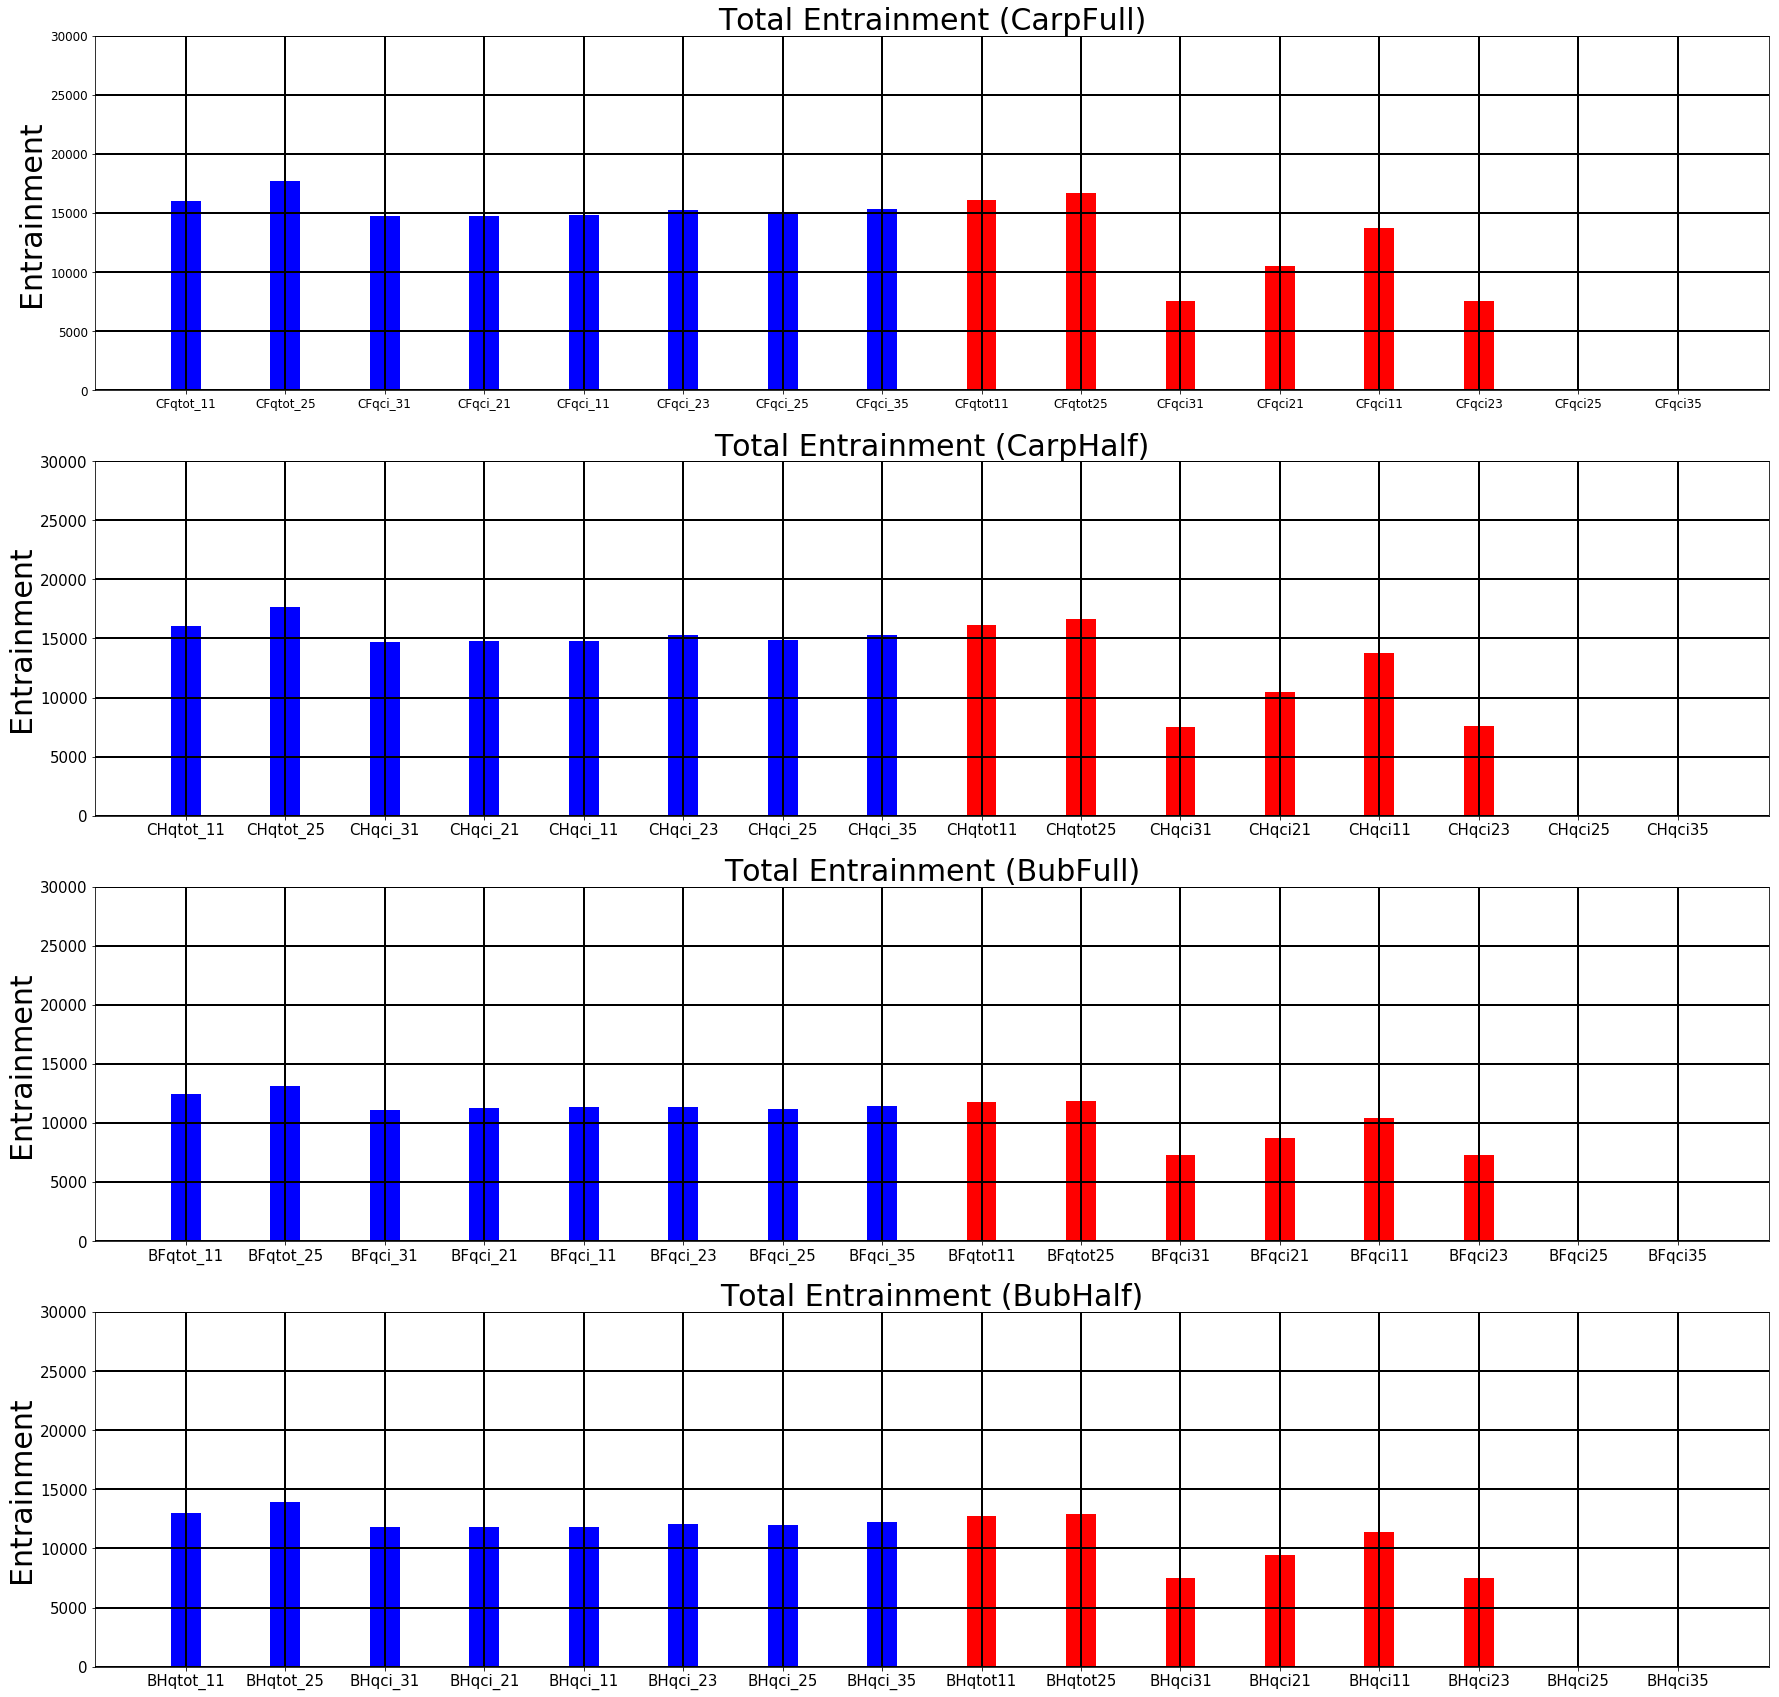

In [52]:
#plotting
fig = plt.figure(figsize=(30, 30))
plt.subplot(4, 1, 1)
y_pos1 = np.arange(len(totalentrainarraycf))
objects1 = ('CFqtot_11', 'CFqtot_25', 'CFqci_31', 'CFqci_21', 'CFqci_11', 'CFqci_23', 'CFqci_25', 'CFqci_35','CFqtot11', 'CFqtot25', 'CFqci31', 'CFqci21', 'CFqci11', 'CFqci23', 'CFqci25', 'CFqci35')

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.bar(y_pos1, totalentrainarraycf, align='center', width=0.3,color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','red','red','red','red','red','red','red','red'])
plt.xticks(y_pos1, objects1)
plt.ylabel('Entrainment',fontsize=30)
plt.ylim(0,30000)
plt.title('Total Entrainment (CarpFull)',fontsize=30)
plt.grid(color='black', linestyle='-', linewidth=2)


plt.subplot(4, 1, 2)
y_pos2 = np.arange(len(totalentrainarraych))
objects2 = ('CHqtot_11', 'CHqtot_25', 'CHqci_31', 'CHqci_21', 'CHqci_11', 'CHqci_23', 'CHqci_25', 'CHqci_35','CHqtot11', 'CHqtot25', 'CHqci31', 'CHqci21', 'CHqci11', 'CHqci23', 'CHqci25', 'CHqci35')

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.bar(y_pos2, totalentrainarraycf, align='center', width=0.3,color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','red','red','red','red','red','red','red','red'])
plt.xticks(y_pos2, objects2)
plt.ylabel('Entrainment',fontsize=30)
plt.ylim(0,30000)
plt.title('Total Entrainment (CarpHalf)',fontsize=30)
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(4, 1, 3)
y_pos3 = np.arange(len(totalentrainarraybf))
objects3 = ('BFqtot_11', 'BFqtot_25', 'BFqci_31', 'BFqci_21', 'BFqci_11', 'BFqci_23', 'BFqci_25', 'BFqci_35','BFqtot11', 'BFqtot25', 'BFqci31', 'BFqci21', 'BFqci11', 'BFqci23', 'BFqci25', 'BFqci35')

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.bar(y_pos3, totalentrainarraybf, align='center', width=0.3,color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','red','red','red','red','red','red','red','red'])
plt.xticks(y_pos3, objects3)
plt.ylabel('Entrainment',fontsize=30)
plt.ylim(0,30000)
plt.title('Total Entrainment (BubFull)',fontsize=30)
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(4, 1, 4)
y_pos4 = np.arange(len(totalentrainarraybh))
objects4 = ('BHqtot_11', 'BHqtot_25', 'BHqci_31', 'BHqci_21', 'BHqci_11', 'BHqci_23', 'BHqci_25', 'BHqci_35','BHqtot11', 'BHqtot25', 'BHqci31', 'BHqci21', 'BHqci11', 'BHqci23', 'BHqci25', 'BHqci35')

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.bar(y_pos4, totalentrainarraybh, align='center', width=0.3,color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','red','red','red','red','red','red','red','red'])
plt.xticks(y_pos4, objects4)
plt.ylabel('Entrainment',fontsize=30)
plt.ylim(0,30000)
plt.title('Total Entrainment (BubHalf)',fontsize=30)
plt.grid(color='black', linestyle='-', linewidth=2)

plt.show()


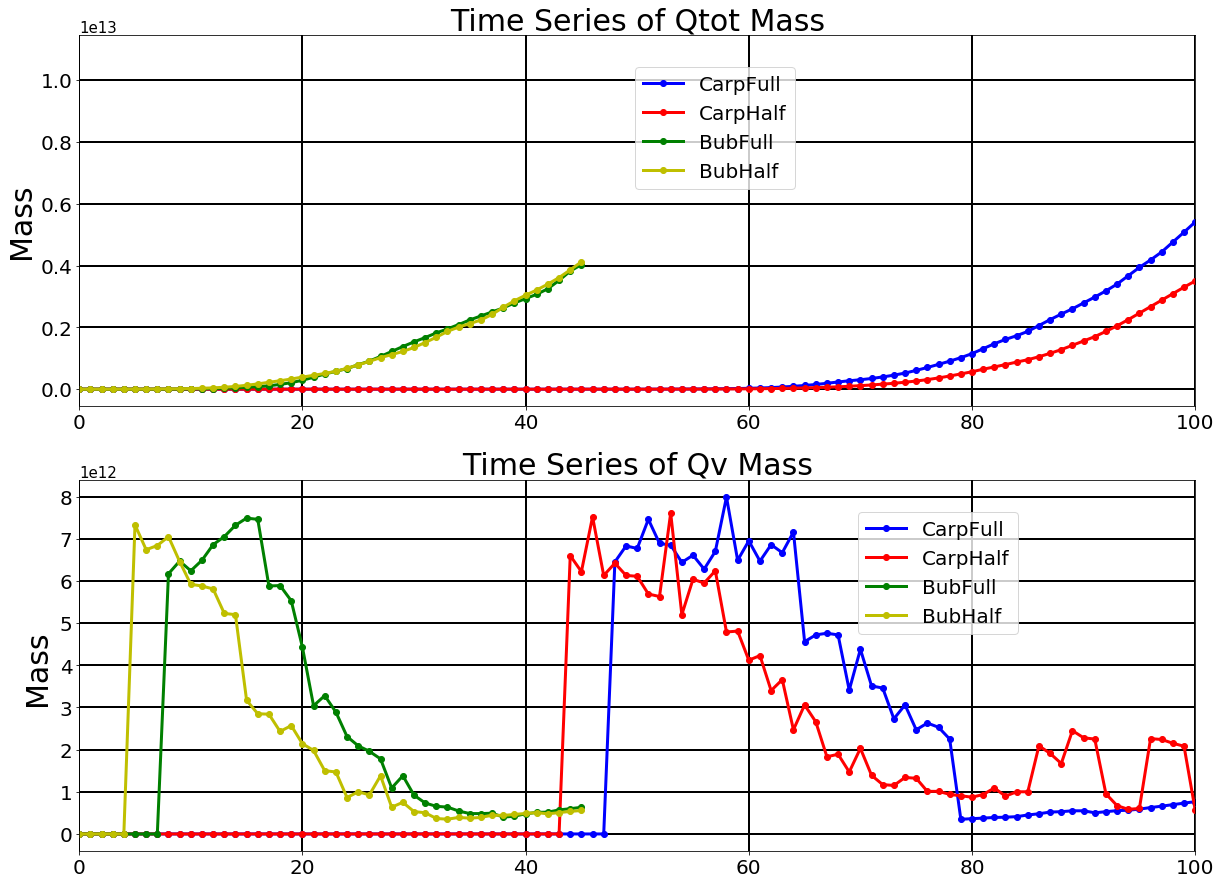

In [53]:
fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.plot(qtotcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(qtotcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(qtotcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(qtotcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mass',fontsize=30)
plt.xlim(0,100)
# plt.ylim(0,1.0*10**12)
plt.title('Time Series of Qtot Mass',fontsize=30)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(2, 1, 2)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

plt.plot(qvcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(qvcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(qvcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(qvcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('Time (min)',fontsize=30)
plt.ylabel('Mass ',fontsize=30)
plt.xlim(0,100)
plt.title('Time Series of Qv Mass',fontsize=30)
plt.legend(bbox_to_anchor=(.85, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)




In [79]:
print(np.shape(cloudtop3))

(45,)


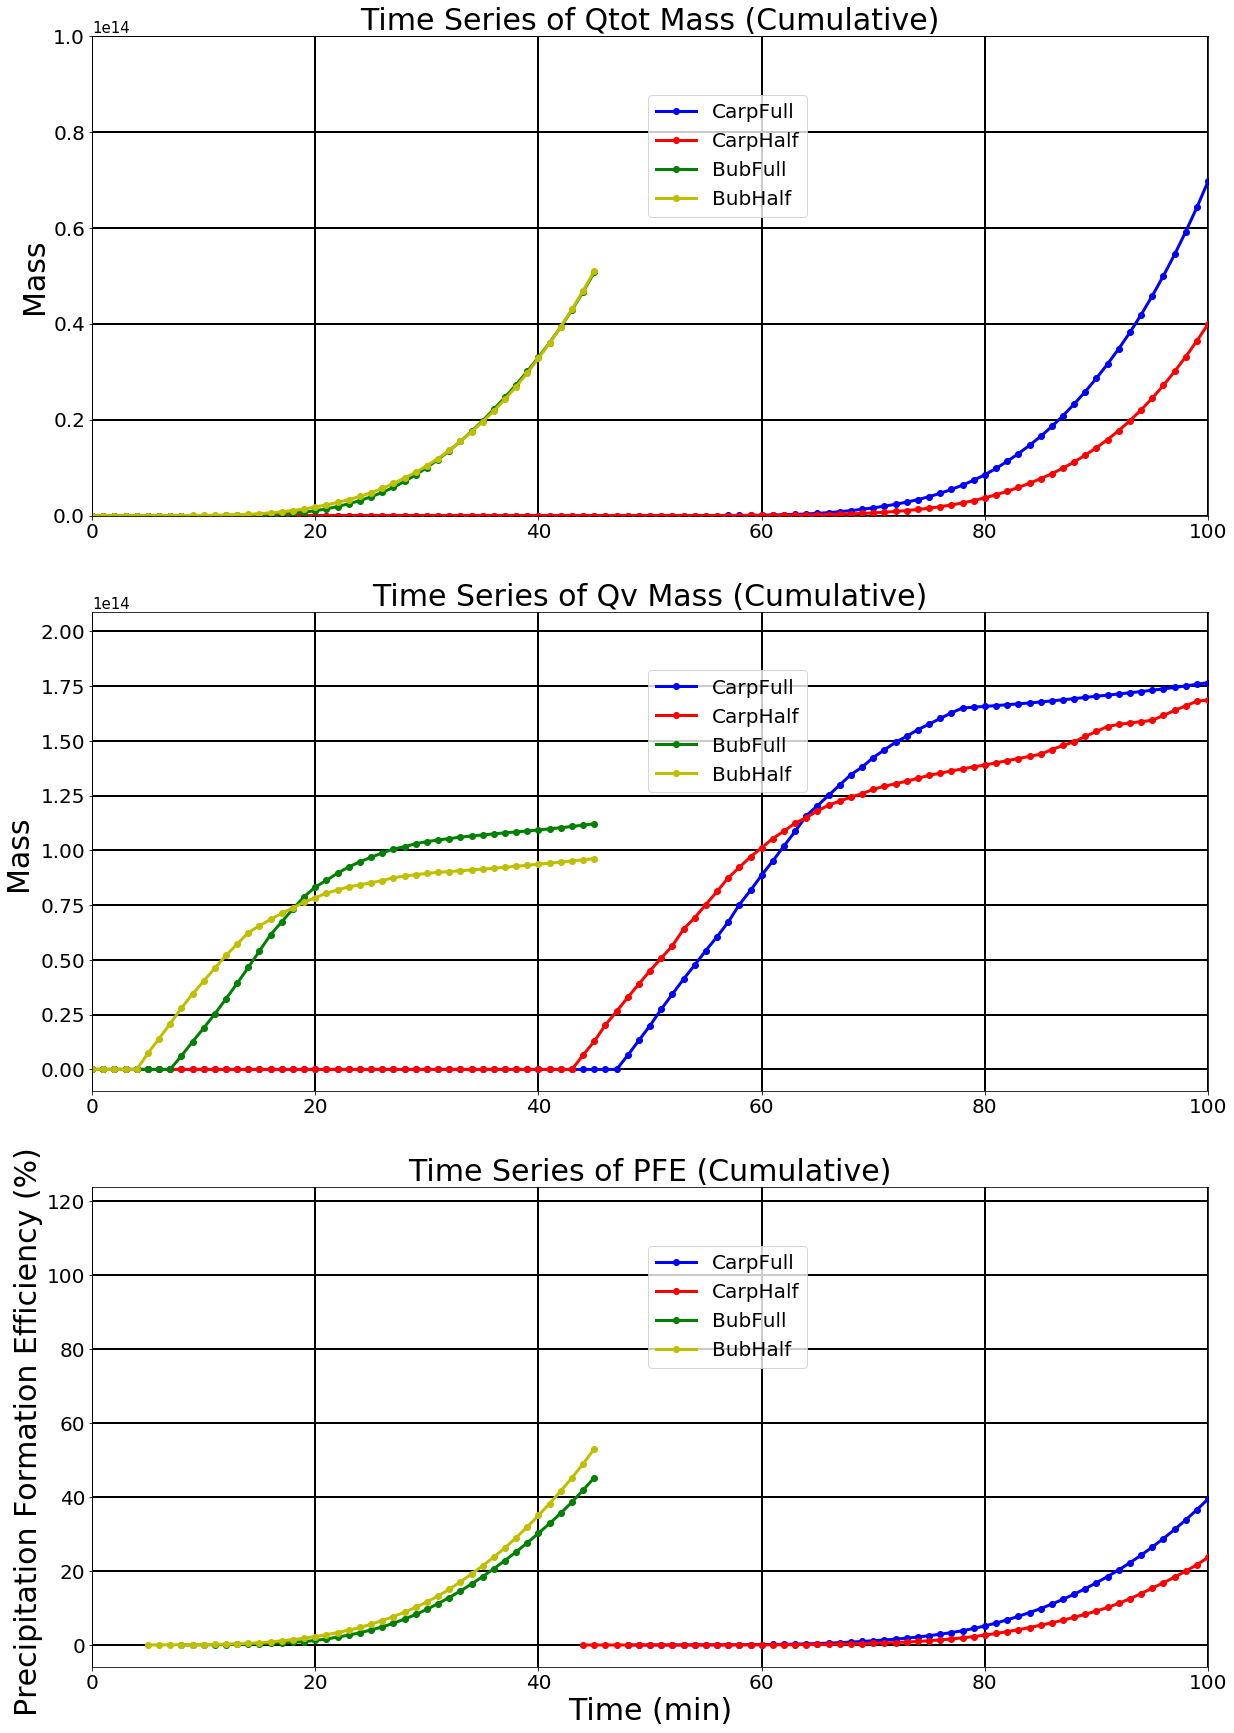

In [75]:
fig = plt.figure(figsize=(20, 30))
plt.subplot(3, 1, 1)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

cumqtotcoreCF = np.cumsum(qtotcoreCF)
cumqtotcoreCH = np.cumsum(qtotcoreCH)
cumqtotcoreBF = np.cumsum(qtotcoreBF)
cumqtotcoreBH = np.cumsum(qtotcoreBH)

plt.plot(cumqtotcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(cumqtotcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(cumqtotcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cumqtotcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mass',fontsize=30)
plt.xlim(0,100)
plt.ylim(0,1.0*10**14)
plt.title('Time Series of Qtot Mass (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(3, 1, 2)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

cumqvcoreCF = np.cumsum(qvcoreCF)
cumqvcoreCH = np.cumsum(qvcoreCH)
cumqvcoreBF = np.cumsum(qvcoreBF)
cumqvcoreBH = np.cumsum(qvcoreBH)

plt.plot(cumqvcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(cumqvcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(cumqvcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cumqvcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('Time (min)',fontsize=30)
plt.ylabel('Mass ',fontsize=30)
plt.xlim(0,100)
plt.title('Time Series of Qv Mass (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(3, 1, 3)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

PFEcoreCF = (cumqtotcoreCF[1:121]/cumqvcoreCF[1:121])*100
PFEcoreCH = (cumqtotcoreCH[1:121]/cumqvcoreCH[1:121])*100
PFEcoreBF = (cumqtotcoreBF[1:46]/cumqvcoreBF[1:46])*100
PFEcoreBH = (cumqtotcoreBH[1:46]/cumqvcoreBH[1:46])*100

plt.plot(PFEcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(PFEcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(PFEcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(PFEcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Time (min)',fontsize=30)
plt.ylabel('Precipitation Formation Efficiency (%) ',fontsize=30)
plt.xlim(0,100)
plt.title('Time Series of PFE (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

In [81]:
print(np.shape(qtotcoreBH))

(46,)


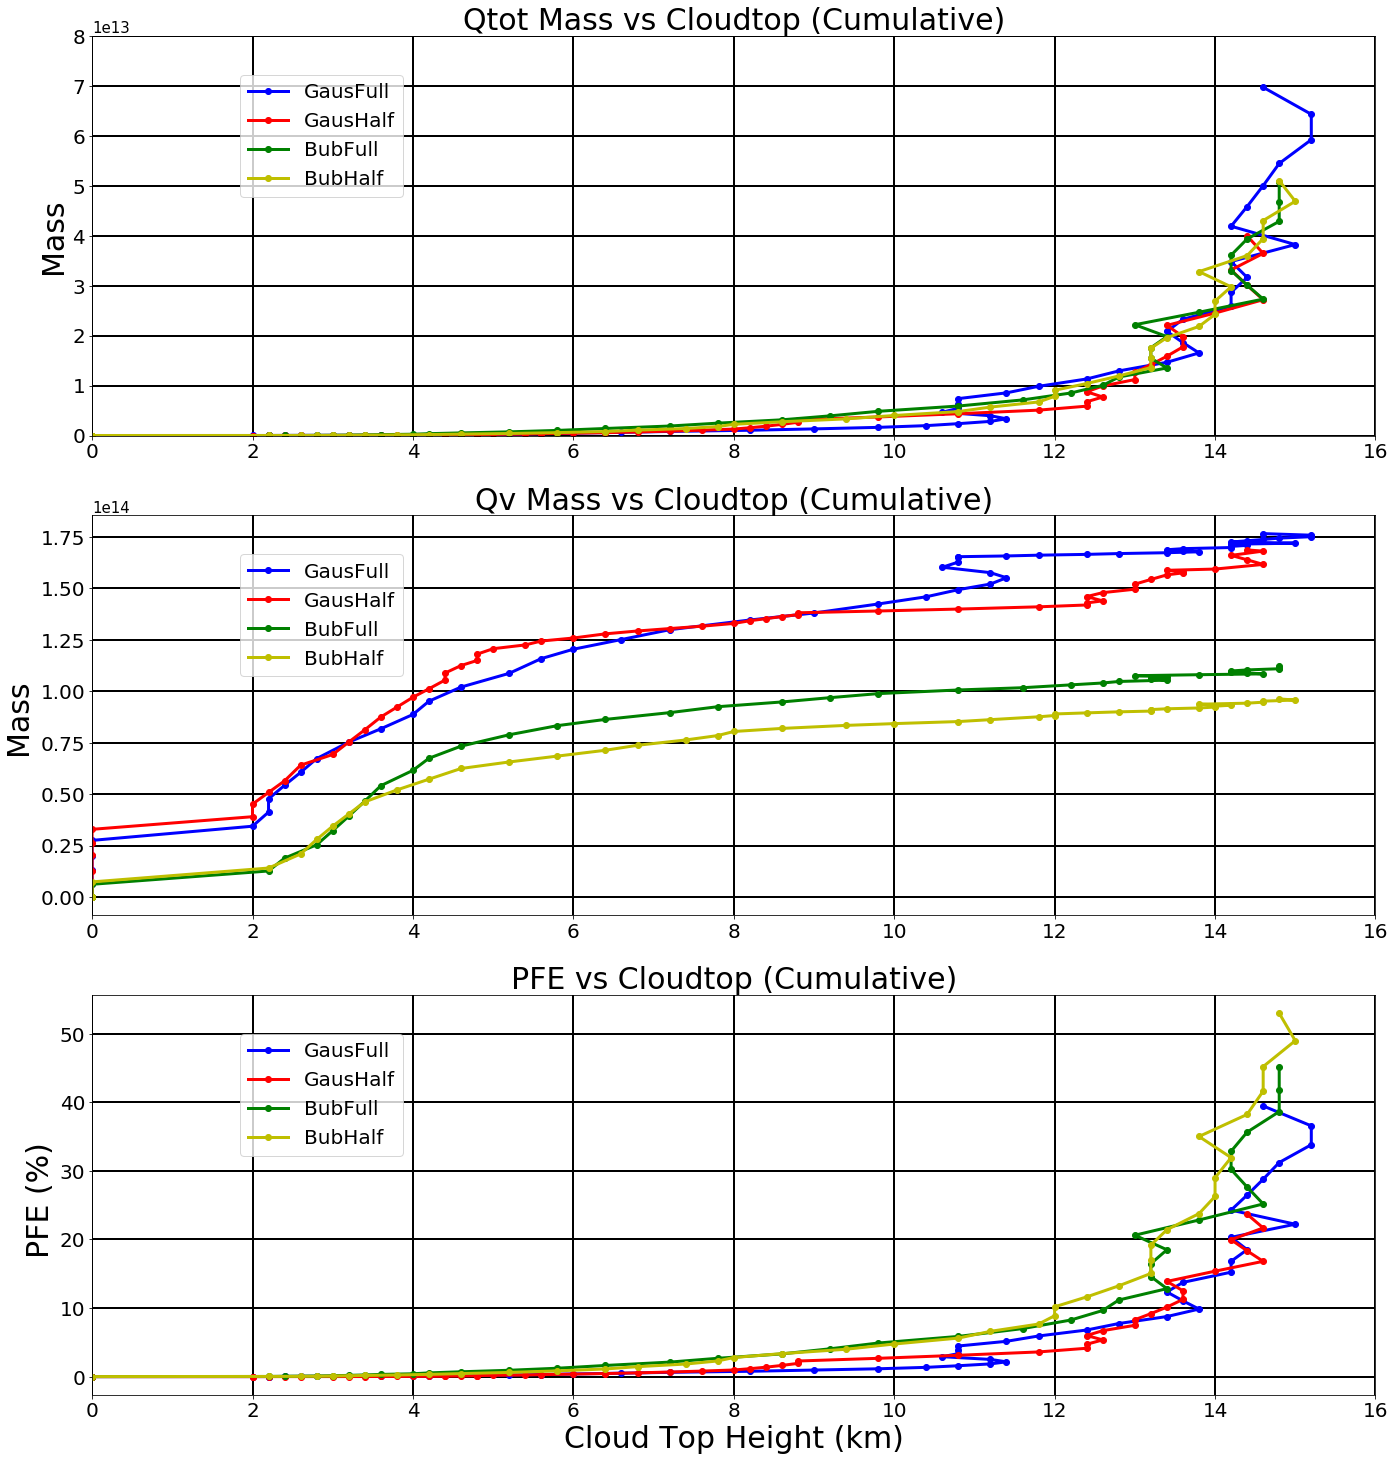

In [99]:
fig = plt.figure(figsize=(23, 25))
plt.subplot(3, 1, 1)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

new1cloudtop1 = cloudtop1[0:100]
new1cloudtop2 = cloudtop2[0:100]

cumqtotcoreCF = np.cumsum(qtotcoreCF[1:101])
cumqtotcoreCH = np.cumsum(qtotcoreCH[1:101])
cumqtotcoreBF = np.cumsum(qtotcoreBF[1:46])
cumqtotcoreBH = np.cumsum(qtotcoreBH[1:46])

plt.plot(new1cloudtop1,cumqtotcoreCF,'-bo',linewidth=3.0,label="GausFull")
plt.plot(new1cloudtop2,cumqtotcoreCH,'-ro',linewidth=3.0,label="GausHalf")
plt.plot(cloudtop3,cumqtotcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cloudtop4,cumqtotcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Mass',fontsize=30)
plt.xlim(0,16)
plt.ylim(0,.8*10**14)
plt.title('Qtot Mass vs Cloudtop (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.25, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(3, 1, 2)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

cumqvcoreCF = np.cumsum(qvcoreCF[1:101])
cumqvcoreCH = np.cumsum(qvcoreCH[1:101])
cumqvcoreBF = np.cumsum(qvcoreBF[1:46])
cumqvcoreBH = np.cumsum(qvcoreBH[1:46])

plt.plot(new1cloudtop1,cumqvcoreCF,'-bo',linewidth=3.0,label="GausFull")
plt.plot(new1cloudtop2,cumqvcoreCH,'-ro',linewidth=3.0,label="GausHalf")
plt.plot(cloudtop3,cumqvcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cloudtop4,cumqvcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('Time (min)',fontsize=30)
plt.ylabel('Mass ',fontsize=30)
plt.xlim(0,16)
plt.title('Qv Mass vs Cloudtop (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.25, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(3, 1, 3)

plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

PFEcoreCF = (cumqtotcoreCF/cumqvcoreCF)*100
PFEcoreCH = (cumqtotcoreCH/cumqvcoreCH)*100
PFEcoreBF = (cumqtotcoreBF/cumqvcoreBF)*100
PFEcoreBH = (cumqtotcoreBH/cumqvcoreBH)*100

plt.plot(new1cloudtop1,PFEcoreCF,'-bo',linewidth=3.0,label="GausFull")
plt.plot(new1cloudtop2,PFEcoreCH,'-ro',linewidth=3.0,label="GausHalf")
plt.plot(cloudtop3,PFEcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cloudtop4,PFEcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cloud Top Height (km)',fontsize=30)
plt.ylabel('PFE (%) ',fontsize=30)
plt.xlim(0,16)
plt.title('PFE vs Cloudtop (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.25, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

In [103]:
print(cumqvcoreBF)

1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     6.170000e+12
9     1.264000e+13
10    1.888000e+13
11    2.537000e+13
12    3.223000e+13
13    3.928000e+13
14    4.660000e+13
15    5.409000e+13
16    6.155000e+13
17    6.743000e+13
18    7.332000e+13
19    7.885000e+13
20    8.328000e+13
21    8.632000e+13
22    8.960000e+13
23    9.249000e+13
24    9.480000e+13
25    9.689000e+13
26    9.885000e+13
27    1.006300e+14
28    1.017200e+14
29    1.031000e+14
30    1.040200e+14
31    1.047540e+14
32    1.054090e+14
33    1.060460e+14
34    1.065900e+14
35    1.070730e+14
36    1.075560e+14
37    1.080480e+14
38    1.084460e+14
39    1.088680e+14
40    1.093460e+14
41    1.098570e+14
42    1.103740e+14
43    1.109440e+14
44    1.115430e+14
45    1.121750e+14
Name: qvrhomwareat, dtype: float64


In [69]:
print(PFEcoreBF)

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8      0.006629
9      0.023647
10     0.051001
11     0.086831
12     0.130714
13     0.184137
14     0.247058
15     0.322479
16     0.415644
17     0.544015
18     0.708987
19     0.926860
20     1.224579
21     1.628625
22     2.116997
23     2.674699
24     3.313111
25     4.058034
26     4.897146
27     5.863887
28     7.000422
29     8.245227
30     9.643173
31    11.169816
32    12.827016
33    14.588791
34    16.475119
35    18.492831
36    20.613289
37    22.833212
38    25.174584
39    27.639737
40    30.198479
41    32.852553
42    35.643203
43    38.632850
44    41.850075
45    45.206890
dtype: float64


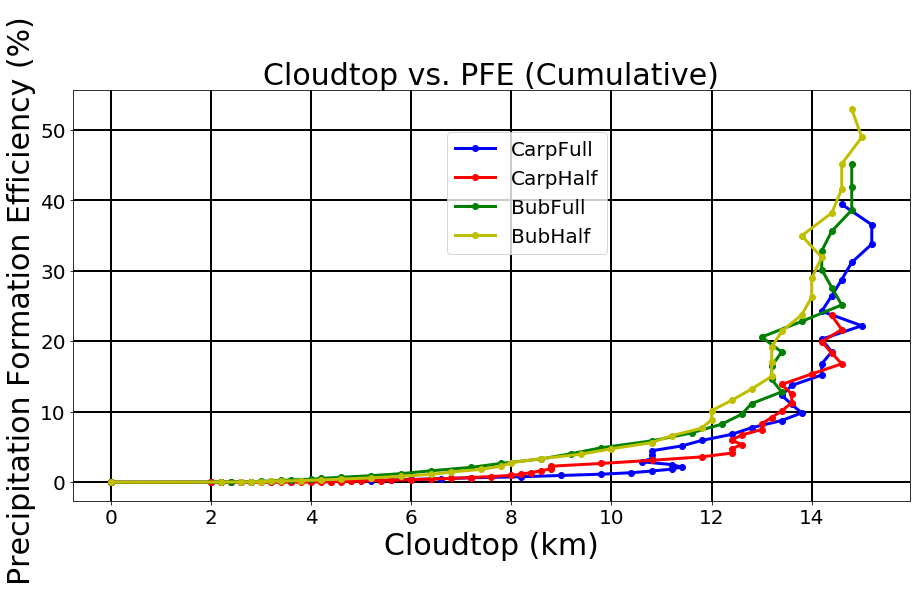

In [55]:
fig = plt.figure(figsize=(15, 7.55))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

PFEcoreCF = (cumqtotcoreCF[1:101]/cumqvcoreCF[1:101])*100
PFEcoreCH = (cumqtotcoreCH[1:101]/cumqvcoreCH[1:101])*100
PFEcoreBF = (cumqtotcoreBF[1:46]/cumqvcoreBF[1:46])*100
PFEcoreBH = (cumqtotcoreBH[1:46]/cumqvcoreBH[1:46])*100

new1cloudtop1 = cloudtop1[0:100]
new1cloudtop2 = cloudtop2[0:100]

plt.plot(new1cloudtop1,PFEcoreCF,'-bo',linewidth=3.0,label="CarpFull")
plt.plot(new1cloudtop2,PFEcoreCH,'-ro',linewidth=3.0,label="CarpHalf")
plt.plot(cloudtop3,PFEcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cloudtop4,PFEcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cloudtop (km)',fontsize=30)
plt.ylabel('Precipitation Formation Efficiency (%) ',fontsize=30)
# plt.xlim(0,100)
plt.title('Cloudtop vs. PFE (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.65, .75), loc=7, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

In [56]:
print(np.shape(cloudtop1))

(120,)


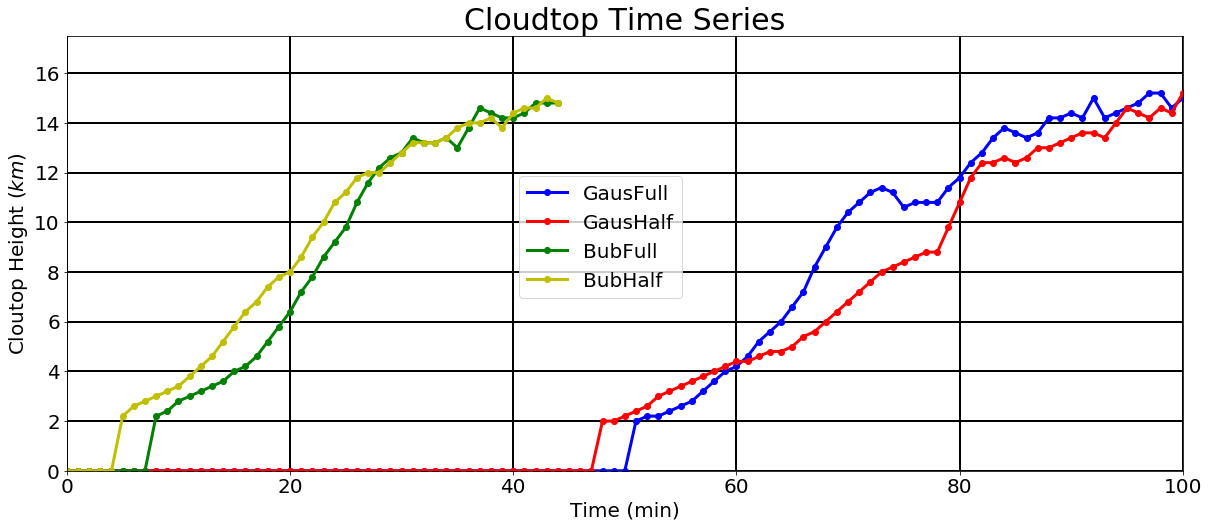

In [73]:
#Cloudtop Time series
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(20, 8))

ax = plt.plot(cloudtop1,'-bo',linewidth=3.0,label="GausFull")         #carpfull
ax = plt.plot(cloudtop2,'-ro',linewidth=3.0,label="GausHalf")         #carphalf
ax = plt.plot(cloudtop3,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(cloudtop4,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Time (min)', fontsize=20)
plt.title('Cloudtop Time Series', fontsize=30)
plt.xlim(0,100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,17.5)
plt.legend(bbox_to_anchor=(.56, .7), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

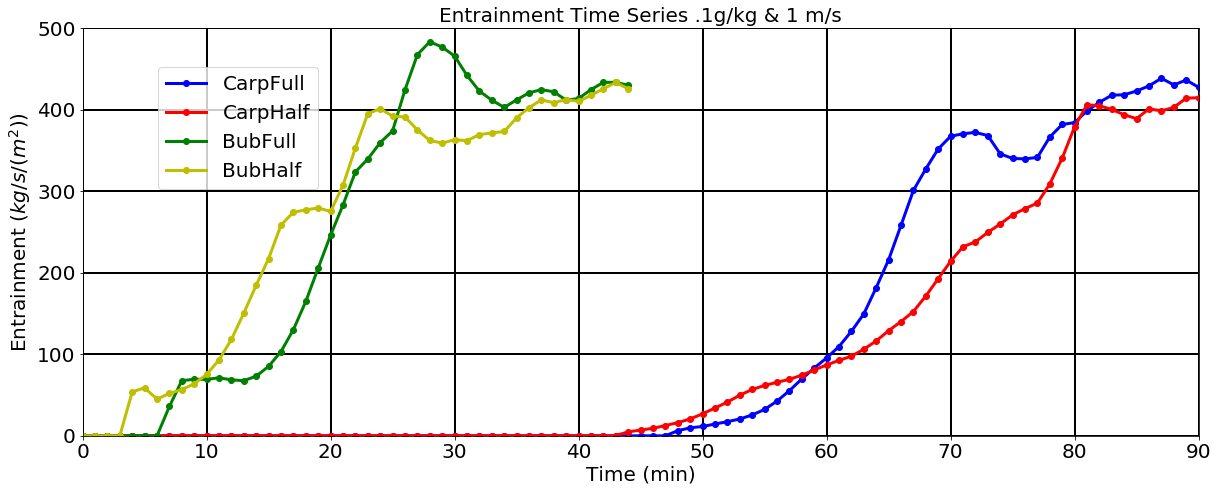

In [58]:
#regular entrainment
fig = plt.figure(figsize=(20, 7.5))
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf_11 = np.append(zero45,t_qcientraincf_11[0:55])
psuedot_qcientrainch_11 = np.append(zero40,t_qcientrainch_11[0:60])


ax = plt.plot(psuedot_qcientraincf_11,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(psuedot_qcientrainch_11,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
# ax = plt.plot(t_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
# ax = plt.plot(t_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(t_qcientrainbf_11,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(t_qcientrainbh_11,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time (min)', fontsize=20)
plt.title('Entrainment Time Series .1g/kg & 1 m/s', fontsize=20)
plt.xlim(0,90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.22, .93), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


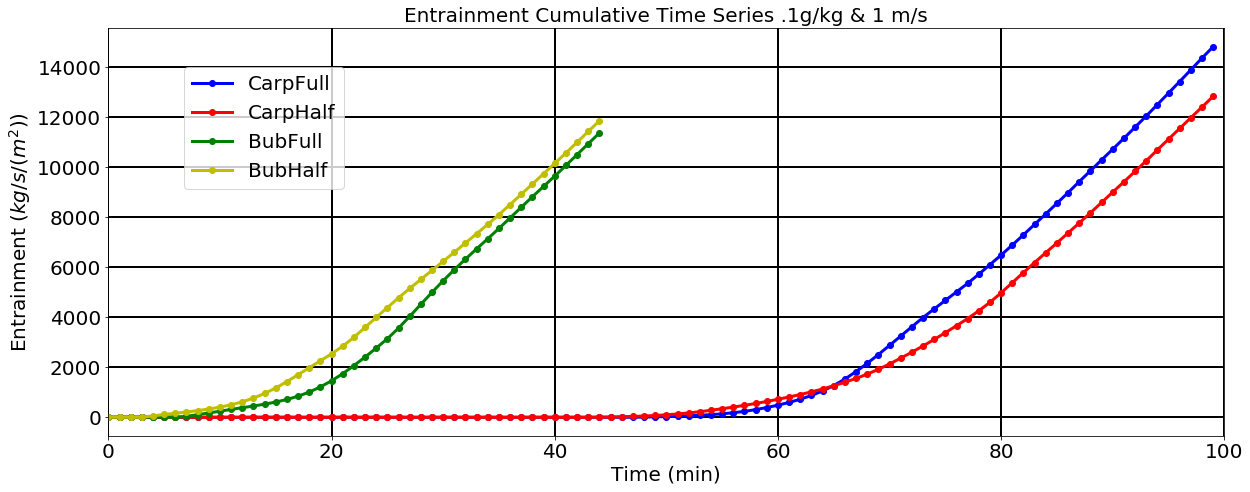

In [59]:
#cumulative entrainment
fig = plt.figure(figsize=(20, 7.5))
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf_11 = np.append(zero45,t_qcientraincf_11[0:55])
psuedot_qcientrainch_11 = np.append(zero40,t_qcientrainch_11[0:60])

cumentraincf_11 = np.cumsum(psuedot_qcientraincf_11)
cumentrainch_11 = np.cumsum(psuedot_qcientrainch_11)
cumentrainbf_11 = np.cumsum(t_qcientrainbf_11)
cumentrainbh_11 = np.cumsum(t_qcientrainbh_11)

ax = plt.plot(cumentraincf_11,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(cumentrainch_11,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(cumentrainbf_11,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(cumentrainbh_11,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time (min)', fontsize=20)
plt.title('Entrainment Cumulative Time Series .1g/kg & 1 m/s', fontsize=20)
plt.xlim(0,100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.22, .93), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


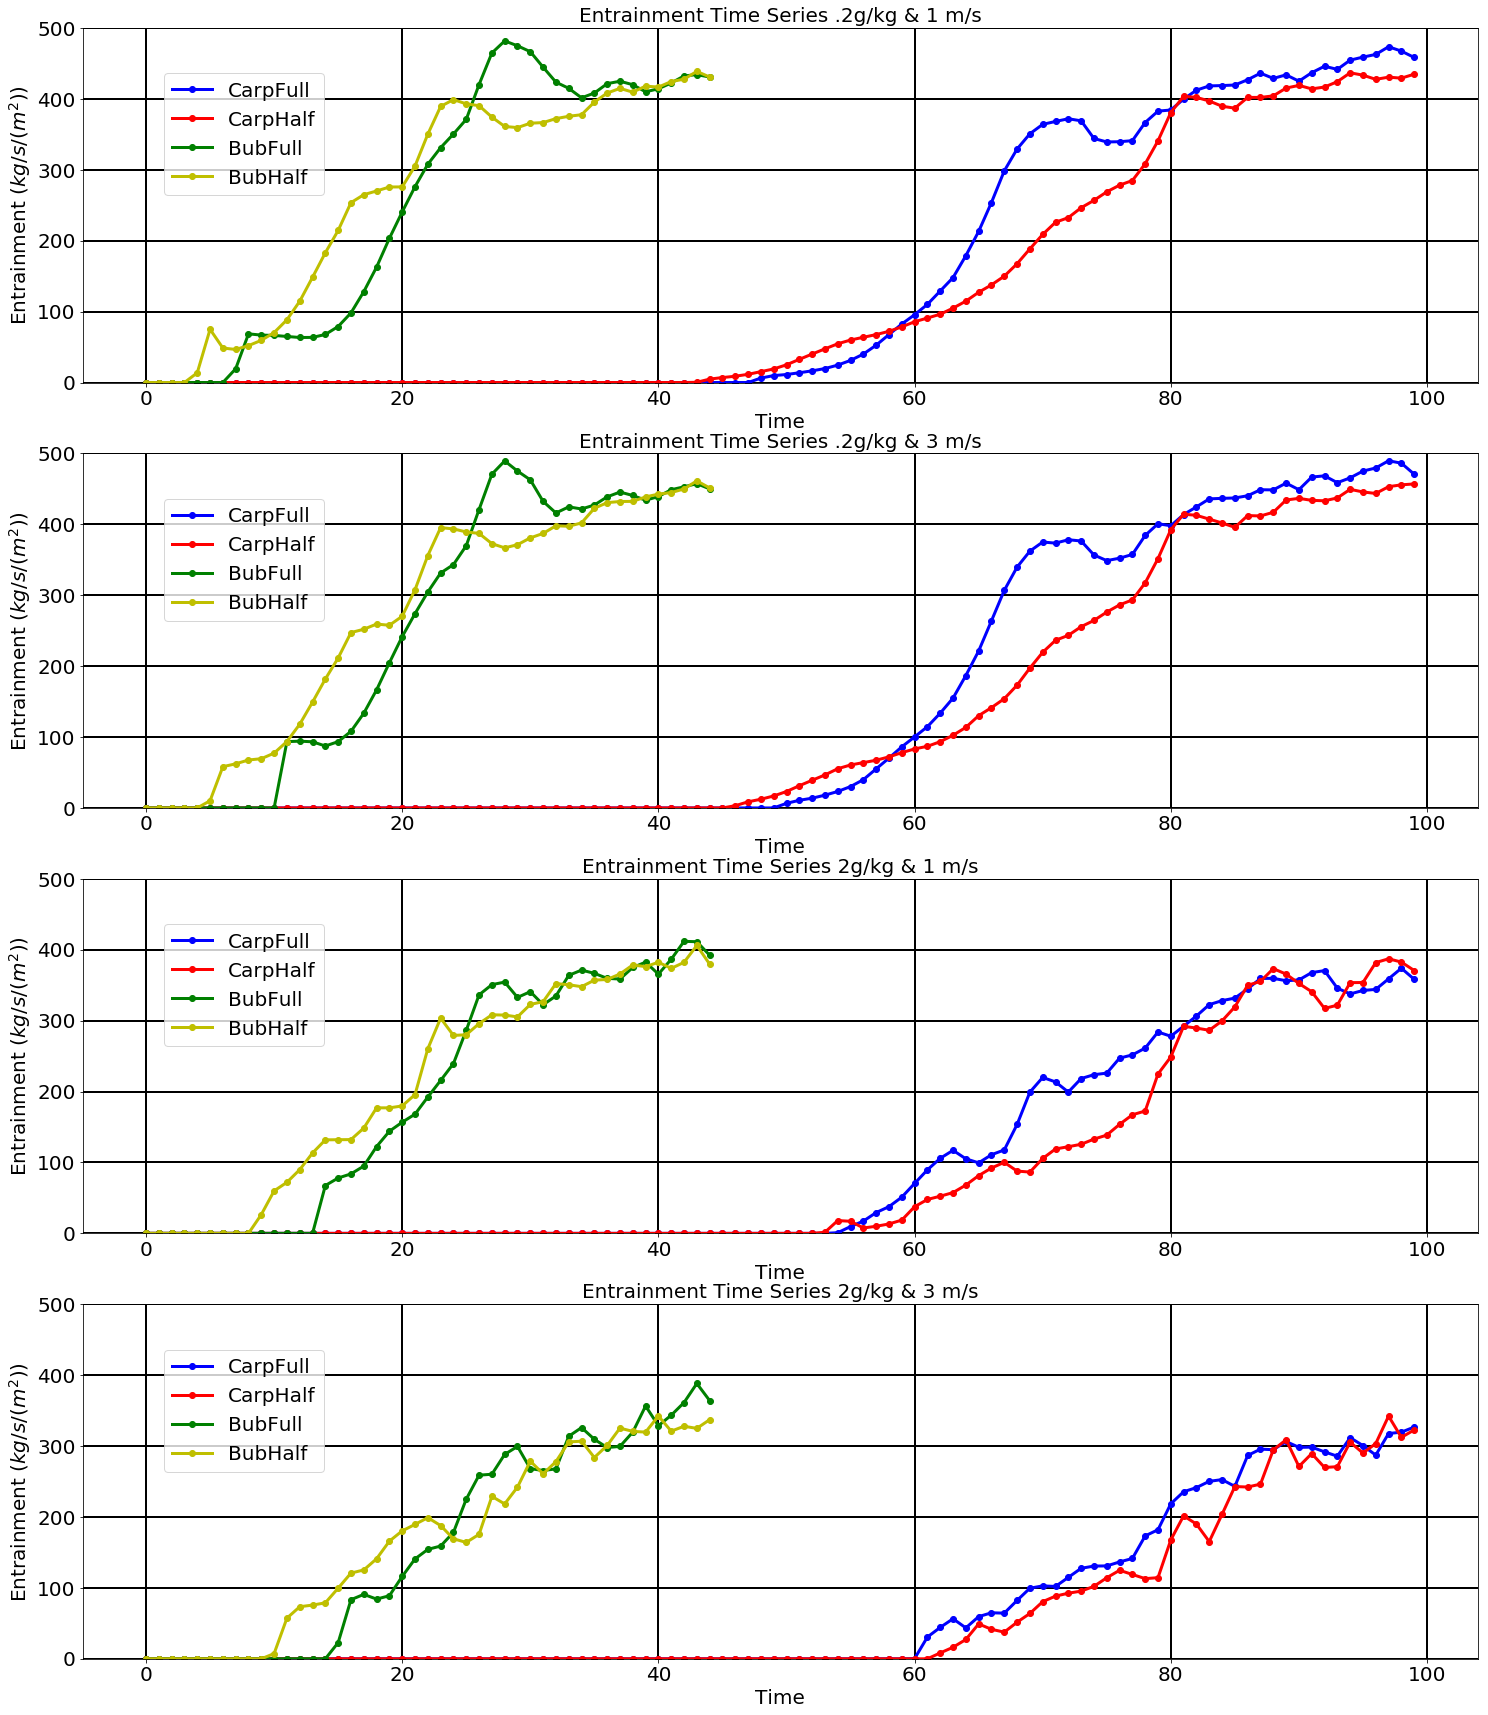

In [60]:
#Entrainment Time series_21

fig = plt.figure(figsize=(25, 30))
plt.subplot(4,1,1)
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf_21 = np.append(zero45,t_qcientraincf_21[0:55])
psuedot_qcientrainch_21 = np.append(zero40,t_qcientrainch_21[0:60])

ax = plt.plot(psuedot_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(psuedot_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
# ax = plt.plot(t_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
# ax = plt.plot(t_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(t_qcientrainbf_21,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(t_qcientrainbh_21,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Entrainment Time Series .2g/kg & 1 m/s', fontsize=20)
# plt.xlim(0,0.3*10**12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.18, .9), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(4,1,2)
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf_23 = np.append(zero45,t_qcientraincf_23[0:55])
psuedot_qcientrainch_23 = np.append(zero40,t_qcientrainch_23[0:60])

ax = plt.plot(psuedot_qcientraincf_23,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(psuedot_qcientrainch_23,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
# ax = plt.plot(t_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
# ax = plt.plot(t_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(t_qcientrainbf_23,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(t_qcientrainbh_23,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Entrainment Time Series .2g/kg & 3 m/s', fontsize=20)
# plt.xlim(0,0.3*10**12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.18, .9), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(4,1,3)
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf21 = np.append(zero45,t_qcientraincf21[0:55])
psuedot_qcientrainch21 = np.append(zero40,t_qcientrainch21[0:60])

ax = plt.plot(psuedot_qcientraincf21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(psuedot_qcientrainch21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
# ax = plt.plot(t_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
# ax = plt.plot(t_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(t_qcientrainbf21,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(t_qcientrainbh21,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Entrainment Time Series 2g/kg & 1 m/s', fontsize=20)
# plt.xlim(0,0.3*10**12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.18, .9), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)

plt.subplot(4,1,4)
zero45 = np.zeros(45)
zero40 = np.zeros(40)
psuedot_qcientraincf23 = np.append(zero45,t_qcientraincf23[0:55])
psuedot_qcientrainch23 = np.append(zero40,t_qcientrainch23[0:60])

ax = plt.plot(psuedot_qcientraincf23,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
ax = plt.plot(psuedot_qcientrainch23,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
# ax = plt.plot(t_qcientraincf_21,'-bo',linewidth=3.0,label="CarpFull")         #carpfull
# ax = plt.plot(t_qcientrainch_21,'-ro',linewidth=3.0,label="CarpHalf")         #carphalf
ax = plt.plot(t_qcientrainbf23,'-go',linewidth=3.0,label="BubFull")         #bubfull
ax = plt.plot(t_qcientrainbh23,'-yo',linewidth=3.0,label="BubHalf")         #bubfull

plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Entrainment Time Series 2g/kg & 3 m/s', fontsize=20)
# plt.xlim(0,0.3*10**12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.18, .9), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


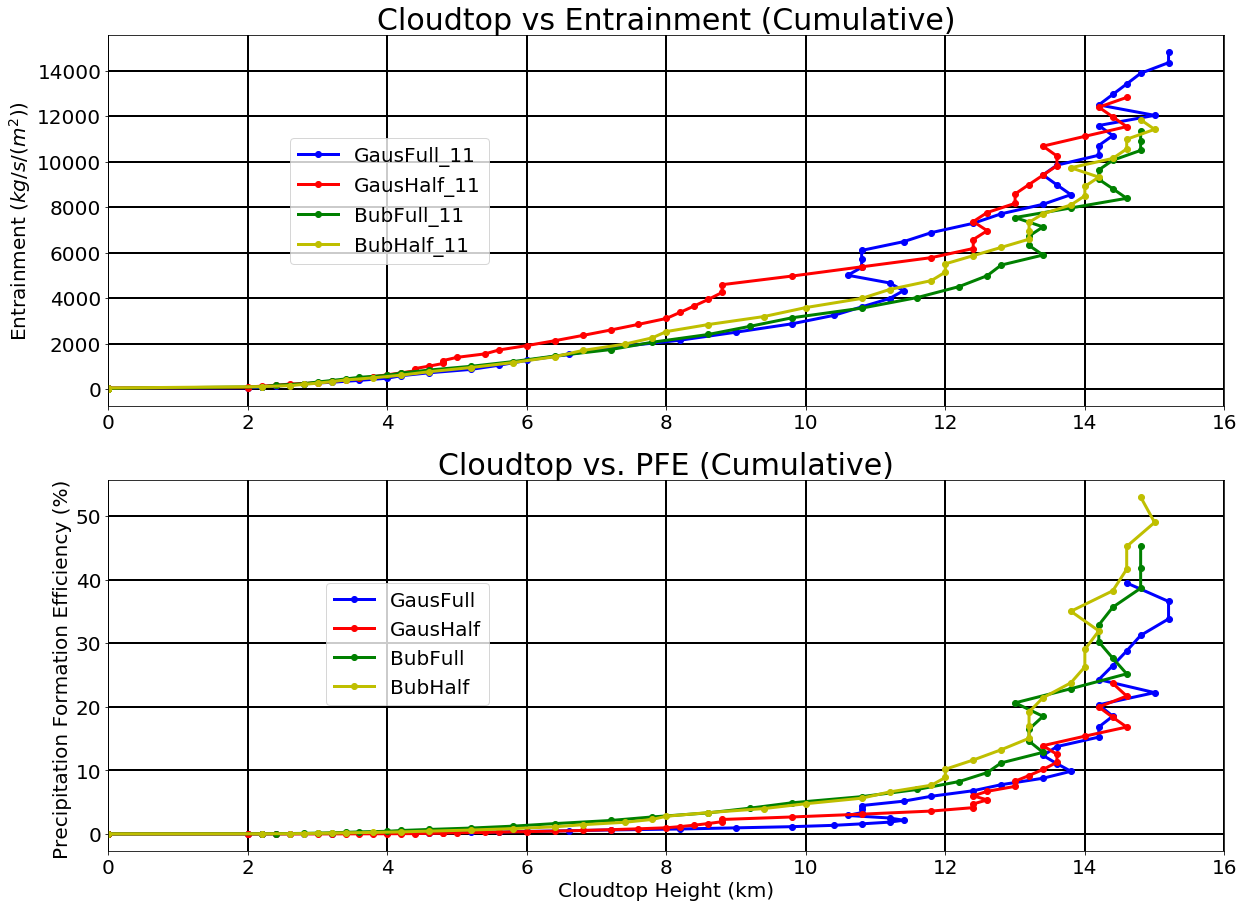

In [62]:
#cloudtop vs entrain
fig = plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
newcloudtop1 = cloudtop1[44:99]
newcloudtop2 = cloudtop2[39:99]
newt_qcientraincf_11 =t_qcientraincf_11[0:55]
newt_qcientrainch_11 =t_qcientrainch_11[0:60]

entraincumsumcf_11 = np.cumsum(newt_qcientraincf_11)
entraincumsumch_11 = np.cumsum(newt_qcientrainch_11)
entraincumsumbf_11 = np.cumsum(t_qcientrainbf_11)
entraincumsumbh_11 = np.cumsum(t_qcientrainbh_11)

#cumulative
ax = plt.plot(newcloudtop1,entraincumsumcf_11,'-bo',linewidth=3.0,label="GausFull_11")         #cf
ax = plt.plot(newcloudtop2,entraincumsumch_11,'-ro',linewidth=3.0,label="GausHalf_11")         #ch
ax = plt.plot(cloudtop3,entraincumsumbf_11,'-go',linewidth=3.0,label="BubFull_11")         #bf
ax = plt.plot(cloudtop4,entraincumsumbh_11,'-yo',linewidth=3.0,label="BubHalf_11")         #bh



# plt.xlabel('Cloutop Height ($km$)', fontsize=20)
plt.ylabel('Entrainment ($kg/s/(m^2)$)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,16)
#plt.ylim(0,17)
plt.title('Cloudtop vs Entrainment (Cumulative)', fontsize=30)
plt.legend(bbox_to_anchor=(.35, .75), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)


plt.subplot(2,1,2)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

PFEcoreCF = (cumqtotcoreCF[1:101]/cumqvcoreCF[1:101])*100
PFEcoreCH = (cumqtotcoreCH[1:101]/cumqvcoreCH[1:101])*100
PFEcoreBF = (cumqtotcoreBF[1:46]/cumqvcoreBF[1:46])*100
PFEcoreBH = (cumqtotcoreBH[1:46]/cumqvcoreBH[1:46])*100

new1cloudtop1 = cloudtop1[0:100]
new1cloudtop2 = cloudtop2[0:100]

plt.plot(new1cloudtop1,PFEcoreCF,'-bo',linewidth=3.0,label="GausFull")
plt.plot(new1cloudtop2,PFEcoreCH,'-ro',linewidth=3.0,label="GausHalf")
plt.plot(cloudtop3,PFEcoreBF,'-go',linewidth=3.0,label="BubFull")
plt.plot(cloudtop4,PFEcoreBH,'-yo',linewidth=3.0,label="BubHalf")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cloudtop Height (km)',fontsize=20)
plt.ylabel('Precipitation Formation Efficiency (%) ',fontsize=20)
plt.xlim(0,16)
plt.title('Cloudtop vs. PFE (Cumulative)',fontsize=30)
plt.legend(bbox_to_anchor=(.35, .75), loc=1, prop={'size': 20})
plt.grid(color='black', linestyle='-', linewidth=2)